# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from statsmodels.tsa.deterministic import DeterministicProcess, CalendarFourier, Fourier

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

plt.rcParams['figure.figsize'] = (20, 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
flu_id = pd.read_csv("VIW_FID_EPI.csv")
flu_net = pd.read_csv("VIW_FNT.csv")
flu_dict = pd.read_csv("VIW_FLU_METADATA.csv")

/var/folders/zh/dvg4994d0_v8dpj_6tb0y44r0000gn/T/ipykernel_15608/111155050.py:1: DtypeWarning: Columns (31,36) have mixed types. Specify dtype option on import or set low_memory=False.
  flu_id = pd.read_csv("VIW_FID_EPI.csv")


In [3]:
flu_id

WHOREGION FLUSEASON HEMISPHERE          ITZ COUNTRY_CODE  \
0            AFR        SH         NH  FLU_MID_AFR          SSD   
1            AFR        SH         NH  FLU_MID_AFR          SSD   
2            AFR        SH         NH  FLU_MID_AFR          SSD   
3            AFR        SH         NH  FLU_MID_AFR          SSD   
4            AFR        SH         NH  FLU_MID_AFR          SSD   
...          ...       ...        ...          ...          ...   
410431       WPR        YR         NH  FLU_SE_ASIA          VNM   
410432       WPR        YR         NH  FLU_SE_ASIA          VNM   
410433       WPR        YR         NH  FLU_SE_ASIA          VNM   
410434       WPR        YR         NH  FLU_SE_ASIA          VNM   
410435       WPR        YR         NH  FLU_SE_ASIA          VNM   

       COUNTRY_AREA_TERRITORY ISO_WEEKSTARTDATE  ISO_YEAR  ISO_WEEK  \
0                 South Sudan        2019-03-25      2019        13   
1                 South Sudan        2019-04-08      2019        15   
2                 South Sudan        2019-04-15      2019        16   
3                 South Sudan        2019-04-29      2019        18   
4                 South Sudan        2019-05-13      2019        20   
...                       ...               ...       ...       ...   
410431               Viet Nam        2021-05-31      2021        22   
410432               Viet Nam        2021-06-21      2021        25   
410433               Viet Nam        2021-07-05      2021        27   
410434               Viet Nam        2021-07-05      2021        27   
410435               Viet Nam        2021-07-05      2021        27   

       MMWR_WEEKSTARTDATE  ...  TREND  GEOSPREAD_COMMENTS ILI_NB_SITES  \
0              2019-03-24  ...    NaN                 NaN          5.0   
1              2019-04-07  ...    NaN                 NaN          NaN   
2              2019-04-14  ...    NaN                 NaN          NaN   
3              2019-04-28  ...    NaN                 NaN          5.0   
4              2019-05-12  ...    NaN                 NaN          NaN   
...                   ...  ...    ...                 ...          ...   
410431         2021-05-30  ...    NaN                 NaN          NaN   
410432         2021-06-20  ...    NaN                 NaN          NaN   
410433         2021-07-04  ...    NaN                 NaN          NaN   
410434         2021-07-04  ...    NaN                 NaN          NaN   
410435         2021-07-04  ...    NaN                 NaN          NaN   

       SARI_NB_SITES  ARI_NB_SITES  PNEU_NB_SITES  COMMENTS  ISO2   ISOYW  \
0                5.0           NaN            NaN       NaN    SS  201913   
1                NaN           NaN            NaN       NaN    SS  201915   
2                NaN           NaN            NaN       NaN    SS  201916   
3                5.0           NaN            NaN       NaN    SS  201918   
4                NaN           NaN            NaN       NaN    SS  201920   
...              ...           ...            ...       ...   ...     ...   
410431           NaN           NaN            NaN       NaN    VN  202122   
410432           NaN           NaN            NaN       NaN    VN  202125   
410433           NaN           NaN            NaN       NaN    VN  202127   
410434           NaN           NaN            NaN       NaN    VN  202127   
410435           NaN           NaN            NaN       NaN    VN  202127   

        MMWRYW  
0       201913  
1       201915  
2       201916  
3       201918  
4       201920  
...        ...  
410431  202122  
410432  202125  
410433  202127  
410434  202127  
410435  202127  

[410436 rows x 40 columns]

In [4]:
flu_net

WHOREGION FLUSEASON HEMISPHERE           ITZ COUNTRY_CODE  \
0           SEAR        YR         NH  FLU_STH_ASIA          BGD   
1            WPR        YR         NH  FLU_EST_ASIA          CHN   
2           SEAR        YR         NH  FLU_STH_ASIA          IND   
3           SEAR        YR         NH  FLU_STH_ASIA          LKA   
4            AMR        YR         NH   FLU_CNT_AMC          MEX   
...          ...       ...        ...           ...          ...   
139756       EUR        NH         NH   FLU_NTH_EUR          EST   
139757       EUR        NH         NH   FLU_NTH_EUR          FIN   
139758       EUR        NH         NH   FLU_EST_EUR          UKR   
139759       EUR        NH         NH   FLU_NTH_EUR          IRL   
139760       AMR        YR         NH   FLU_CNT_AMC          MEX   

       COUNTRY_AREA_TERRITORY ISO_WEEKSTARTDATE  ISO_YEAR  ISO_WEEK  \
0                  Bangladesh        2012-12-31      2013         1   
1                       China        2012-08-20      2012        34   
2                       India        2011-12-05      2011        49   
3                   Sri Lanka        2015-09-28      2015        40   
4                      Mexico        2022-03-28      2022        13   
...                       ...               ...       ...       ...   
139756                Estonia        2015-03-09      2015        11   
139757                Finland        2009-09-28      2009        40   
139758                Ukraine        2012-10-22      2012        43   
139759                Ireland        2015-03-30      2015        14   
139760                 Mexico        2020-02-17      2020         8   

       MMWR_WEEKSTARTDATE  ...  PARAINFLUENZA  RHINO  RSV  OTHERRESPVIRUS  \
0              2012-12-30  ...            NaN    NaN  NaN             NaN   
1              2012-08-19  ...            NaN    NaN  NaN             NaN   
2              2011-12-04  ...            NaN    NaN  NaN             NaN   
3              2015-09-27  ...            NaN    NaN  NaN             NaN   
4              2022-03-27  ...            NaN    NaN  NaN             NaN   
...                   ...  ...            ...    ...  ...             ...   
139756         2015-03-08  ...            NaN    NaN  3.0             NaN   
139757         2009-09-27  ...            NaN    NaN  NaN             NaN   
139758         2012-10-21  ...            NaN    NaN  0.0             NaN   
139759         2015-03-29  ...            NaN    NaN  1.0             NaN   
139760         2020-02-16  ...            1.0    9.0  2.0             NaN   

        OTHER_RESPVIRUS_DETAILS  LAB_RESULT_COMMENT  \
0                           NaN                 NaN   
1                           NaN                 NaN   
2                           NaN                 NaN   
3                           NaN                 NaN   
4                           NaN                 NaN   
...                         ...                 ...   
139756                      NaN                 NaN   
139757                      NaN                 NaN   
139758                      NaN                 NaN   
139759                      NaN                 NaN   
139760                      NaN                 NaN   

                                              WCR_COMMENT  ISO2   ISOYW  \
0                                                     NaN    BD  201301   
1       ILI% in south of China in this week£º3.20%    ...    CN  201234   
2                                                     NaN    IN  201149   
3                                                     NaN    LK  201540   
4                                                     NaN    MX  202213   
...                                                   ...   ...     ...   
139756                                                NaN    EE  201511   
139757                                                NaN    FI  200940   
139758                                                NaN    UA  201243   
1

In [7]:
flu_dict

DatasetName    TableName      FieldName DataType  \
0       FluNet      VIW_FNT      WHOREGION   string   
1       FluNet      VIW_FNT      FLUSEASON   string   
2       FluNet      VIW_FNT     HEMISPHERE   string   
3       FluNet      VIW_FNT            ITZ   string   
4       FluNet      VIW_FNT   COUNTRY_CODE   string   
..         ...          ...            ...      ...   
84       fluID  VIW_FID_EPI       COMMENTS   string   
85       fluID  VIW_FID_EPI   ILI_NB_SITES  integer   
86       fluID  VIW_FID_EPI  SARI_NB_SITES  integer   
87       fluID  VIW_FID_EPI   ARI_NB_SITES  integer   
88       fluID  VIW_FID_EPI  PNEU_NB_SITES  integer   

                                          Description  \
0         WHO regions (AFR, AMR, EMR, EUR, SEAR, WPR)   
1   Reporting season (NH=northern hemisphere, SH=s...   
2   Hemisphere (NH=northern hemisphere, SH=souther...   
3                         Influenza transmission zone   
4                                  ISO3 country codes   
..                                                ...   
84                                           Comments   
85  Number of surveillance reporting sites for ILI...   
86  Number of surveillance reporting sites for SAR...   
87  Number of surveillance reporting sites for ARI...   
88  Number of surveillance reporting sites for pne...   

                                             Comments  
0            see: https://www.who.int/about/structure  
1                                                 NaN  
2                                                 NaN  
3   see: https://cdn.who.int/media/docs/default-so...  
4   includes WHO defined codes if not ISO3 code av...  
..                                                ...  
84                                                NaN  
85                                                NaN  
86                                                NaN  
87                                                NaN  
88                                                NaN  

[89 rows x 6 columns]

# Dictionary

## FLU_NET

In [8]:
flu_net_dict = flu_dict[flu_dict.TableName == "VIW_FNT"].drop(["DatasetName","TableName"],axis=1)

In [7]:
flu_net_dict

FieldName DataType  \
0                 WHOREGION   string   
1                 FLUSEASON   string   
2                HEMISPHERE   string   
3                       ITZ   string   
4              COUNTRY_CODE   string   
5    COUNTRY_AREA_TERRITORY   string   
6                      ISO2   string   
7         ISO_WEEKSTARTDATE     date   
8                  ISO_YEAR  integer   
9                  ISO_WEEK  integer   
10                    ISOYW  integer   
11       MMWR_WEEKSTARTDATE     date   
12                MMWR_YEAR  integer   
13                MMWR_WEEK  integer   
14                   MMWRYW  integer   
15            ORIGIN_SOURCE   string   
16         SPEC_RECEIVED_NB  integer   
17        SPEC_PROCESSED_NB  integer   
18                AH1N12009  integer   
19                      AH1  integer   
20                      AH3  integer   
21                      AH5  integer   
22                    AH7N9  integer   
23           AOTHER_SUBTYPE  integer   
24   AOTHER_SUBTYPE_DETAILS   string   
25             ANOTSUBTYPED  integer   
26           ANOTSUBTYPABLE  integer   
27                    INF_A  integer   
28                BVIC_2DEL  integer   
29                BVIC_3DEL  integer   
30              BVIC_DELUNK  integer   
31               BVIC_NODEL  integer   
32                     BYAM  integer   
33           BNOTDETERMINED  integer   
34                    INF_B  integer   
35                  INF_ALL  integer   
36             INF_NEGATIVE  integer   
37             ILI_ACTIVITY  integer   
38                    ADENO  integer   
39                     BOCA  integer   
40             HUMAN_CORONA  integer   
41               METAPNEUMO  integer   
42            PARAINFLUENZA  integer   
43                    RHINO  integer   
44                      RSV  integer   
45           OTHERRESPVIRUS  integer   
46  OTHER_RESPVIRUS_DETAILS   string   
47       LAB_RESULT_COMMENT   string   
48              WCR_COMMENT   string   

                                          Description  \
0         WHO regions (AFR, AMR, EMR, EUR, SEAR, WPR)   
1   Reporting season (NH=northern hemisphere, SH=s...   
2   Hemisphere (NH=northern hemisphere, SH=souther...   
3                         Influenza transmission zone   
4                                  ISO3 country codes   
5                     Country, area or territory name   
6                                   ISO2 country code   
7                          Week start date (ISO 8601)   
8                                    Year  (ISO 8601)   
9                                    Week  (ISO 8601)   
10                            Year and week (ISO8601)   
11                             Week start date (MMWR)   
12                                        Year (MMWR)   
13                                        Week (MMWR)   
14                               Year and week (MMWR)   
15  Surveillance site type (NONSENTINEL/SENTINEL/N...   
16         Number of specimens received for influenza   
17  Number of specimens processed for influenza wi...   
18                  Number of A(H1N1)pdm09 detections   
19  Number of A(H1) detections (other than A(H1N1)...   
20                         Number of A(H3) detections   
21                         Number of A(H5) detections   
22                       Number of A(H7N9) detections   
23     Number of other influenza A subtype detections   
24         Name for A other subtype(s) detected cases   
25      Number of not subtyped influenza A detections   
26      Number of unsubtypable influenza A detections   
27    Number of influenza A detections (all subtypes)   
28  Number of B (Victoria lineage) 2-deletion dete...   
29  Number of B (Victoria lineage) 3-deletion dete...   
30  Number of B (Victoria lineage) detections (del...   
31  Number of B (Victoria lineage) detections (del...   
32          Number of B (Yamagata lineage) detections   
33  Number of influenza B detections (lineage not ...   
34    Number of influe

In [9]:
flu_net_dict[flu_net_dict.FieldName == "FLUSEASON"]["Description"].iloc[0]

'Reporting season (NH=northern hemisphere, SH=southern hemisphere, YR=year-round reporting)'

In [10]:
flu_net_dict[flu_net_dict.FieldName == "ORIGIN_SOURCE"]["Description"].iloc[0]

'Surveillance site type (NONSENTINEL/SENTINEL/NOTDEFINED)'

In [11]:
flu_net_dict[flu_net_dict.FieldName == "HEMISPHERE"]["Description"].iloc[0]

'Hemisphere (NH=northern hemisphere, SH=southern hemisphere)'

# FLU_NET

In [12]:
itz_vals = list(flu_net["ITZ"].value_counts().index)
itz_counts = list(flu_net["ITZ"].value_counts())

Text(0.5, 1.0, 'ITZ')

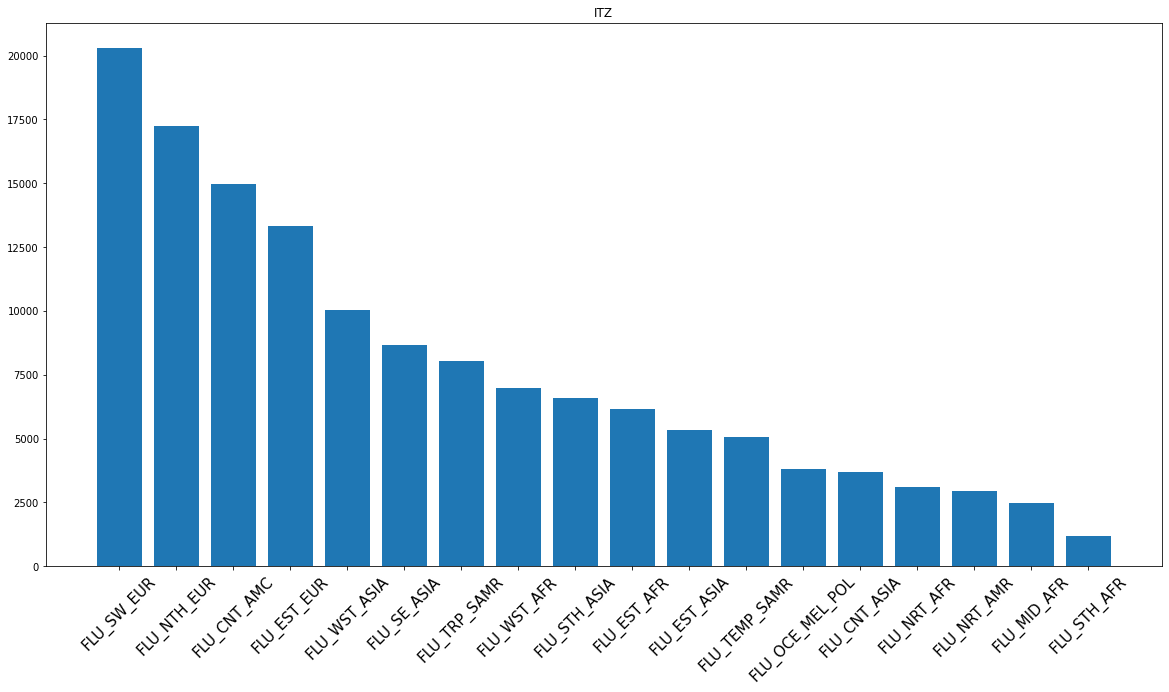

In [14]:
plt.bar(itz_vals,itz_counts)
plt.xticks(rotation=45,size=15)
plt.title("ITZ")


In [15]:
flu_net["COUNTRY_CODE"].value_counts()

RUS    1859
ESP    1771
NOR    1639
SVN    1613
USA    1611
       ... 
SDN      21
NAM      21
ZWE       9
GUY       2
MSR       1
Name: COUNTRY_CODE, Length: 181, dtype: int64

In [16]:
flu_net_dict[flu_net_dict.FieldName == "INF_A"]["Comments"].iloc[0]

'Number of specimens in which influenza virus antigen was detected with any kind of method; to be reported for year and week when the sample was taken.'

## defs

In [3]:
def pd_to_weektime(df):
    
    indices_ = list(df.index)
    indices_.sort()
    df = df.loc[indices_]

    indices_new = []
    for i in range(len(indices_)):
        d =  str(indices_[i])[:4]+"-"+str(indices_[i])[4:]
       # d= datetime.datetime.strptime(d + '-1', "%Y-%W-%w")
        indices_new.append(d)
    indices_new
    df.index = indices_new
    return df

In [4]:
def create_all_fourier(period):
    fourier = []
    for j in range(int(np.floor(period/2))):
        fourier.append(Fourier(period,j))
    return fourier

In [5]:
class BoostedHybrid:
    def __init__(self,model1,model2):
        self.model1= model1
        self.model2= model2
        self.y_columns = None

    def fit(self,X_1,X_2,y):
        self.model1.fit(X_1,y)
        y_fit=pd.DataFrame(self.model1.predict(X_1),index=X_1.index,columns=y.columns)
        y_resid = y-y_fit
        y_resid = y_resid.stack().squeeze()
        
        self.model2.fit(X_2,y_resid)

        self.y_columns=y.columns
        self.y_fit = y_fit
        self.y_resid = y_resid
    def predict(self,X_1,X_2):
        y_pred = pd.DataFrame(self.model1.predict(X_1),index=X_1.index,columns=self.y_columns)
        y_pred = y_pred.stack().squeeze()
        y_pred +=self.model2.predict(X_2)
        return y_pred.unstack()

In [6]:
def create_lags(df,col,num_lags,start,space):
    df_new = df.copy()
    for i in range(num_lags):
        new_col = col+"_lag_"+str(start+i*space)
        df_new[new_col] = df_new[col].shift(start + i*space).fillna(0.0)
    return df_new.drop([col],axis=1)

In [7]:
def plot_year_lags(main_df,compare_df,col,title):
    
    X_lags = create_lags(compare_df,col,51,1,1)
    ind_start = list(compare_df.index).index(dates[0])
    ind_end = list(compare_df.index).index(dates[-1])
    X_lags = X_lags[ind_start:ind_end]
    new_df = main_df.join(X_lags, on=main_df.index)
    plt.plot(abs(new_df.corr()[col].drop([col])))
    plt.xticks(ticks = list(np.arange(1,51)), rotation=90)
    plt.title(title)
    plt.show()

In [8]:
# prep arb data set
def prep_country(country_code,col):


    tmp_df  = flu_net[flu_net.COUNTRY_CODE==country_code][["MMWRYW",col]].groupby("MMWRYW").sum()
    if tmp_df.empty:
        print("Country code or column wrong, this is an empty dataframe")
    tmp_df = pd_to_weektime(tmp_df)
    return tmp_df

## USA all influenza

In [9]:
flu_net[flu_net.COUNTRY_CODE =="USA"]

WHOREGION FLUSEASON HEMISPHERE          ITZ COUNTRY_CODE  \
56           AMR        NH         NH  FLU_NRT_AMR          USA   
207          AMR        NH         NH  FLU_NRT_AMR          USA   
218          AMR        NH         NH  FLU_NRT_AMR          USA   
246          AMR        NH         NH  FLU_NRT_AMR          USA   
344          AMR        NH         NH  FLU_NRT_AMR          USA   
433          AMR        NH         NH  FLU_NRT_AMR          USA   
724          AMR        NH         NH  FLU_NRT_AMR          USA   
904          AMR        NH         NH  FLU_NRT_AMR          USA   
961          AMR        NH         NH  FLU_NRT_AMR          USA   
1096         AMR        NH         NH  FLU_NRT_AMR          USA   
1196         AMR        NH         NH  FLU_NRT_AMR          USA   
1214         AMR        NH         NH  FLU_NRT_AMR          USA   
1335         AMR        NH         NH  FLU_NRT_AMR          USA   
1499         AMR        NH         NH  FLU_NRT_AMR          USA   
1605         AMR        NH         NH  FLU_NRT_AMR          USA   
1618         AMR        NH         NH  FLU_NRT_AMR          USA   
1801         AMR        NH         NH  FLU_NRT_AMR          USA   
1861         AMR        NH         NH  FLU_NRT_AMR          USA   
1952         AMR        NH         NH  FLU_NRT_AMR          USA   
2271         AMR        NH         NH  FLU_NRT_AMR          USA   
2303         AMR        NH         NH  FLU_NRT_AMR          USA   
2357         AMR        NH         NH  FLU_NRT_AMR          USA   
2504         AMR        NH         NH  FLU_NRT_AMR          USA   
2505         AMR        NH         NH  FLU_NRT_AMR          USA   
2577         AMR        NH         NH  FLU_NRT_AMR          USA   
2586         AMR        NH         NH  FLU_NRT_AMR          USA   
2921         AMR        NH         NH  FLU_NRT_AMR          USA   
2932         AMR        NH         NH  FLU_NRT_AMR          USA   
3105         AMR        NH         NH  FLU_NRT_AMR          USA   
3107         AMR        NH         NH  FLU_NRT_AMR          USA   
3143         AMR        NH         NH  FLU_NRT_AMR          USA   
3193         AMR        NH         NH  FLU_NRT_AMR          USA   
3304         AMR        NH         NH  FLU_NRT_AMR          USA   
3326         AMR        NH         NH  FLU_NRT_AMR          USA   
3383         AMR        NH         NH  FLU_NRT_AMR          USA   
3392         AMR        NH         NH  FLU_NRT_AMR          USA   
3395         AMR        NH         NH  FLU_NRT_AMR          USA   
3646         AMR        NH         NH  FLU_NRT_AMR          USA   
3757         AMR        NH         NH  FLU_NRT_AMR          USA   
3763         AMR        NH         NH  FLU_NRT_AMR          USA   
3768         AMR        NH         NH  FLU_NRT_AMR          USA   
3812         AMR        NH         NH  FLU_NRT_AMR          USA   
4033         AMR        NH         NH  FLU_NRT_AMR          USA   
4090         AMR        NH         NH  FLU_NRT_AMR          USA   
4283         AMR        NH         NH  FLU_NRT_AMR          USA   
4367         AMR        NH         NH  FLU_NRT_AMR          USA   
4529         AMR        NH         NH  FLU_NRT_AMR          USA   
4551         AMR        NH         NH  FLU_NRT_AMR          USA   
4597         AMR        NH         NH  FLU_NRT_AMR          USA   
4675         AMR        NH         NH  FLU_NRT_AMR          USA   
4800         AMR        NH         NH  FLU_NRT_AMR          USA   
5146         AMR        NH         NH  FLU_NRT_AMR          USA   
5218         AMR        NH         NH  FLU_NRT_AMR          USA   
5254         AMR        NH         NH  FLU_NRT_AMR          USA   
5568         AMR        NH         NH  FLU_NRT_AMR          USA   
5616         AMR        NH         NH  FLU_NRT_AMR          USA   
5692         AMR        NH         NH  FLU_NRT_AMR          USA   
5716         AMR        NH         NH  FLU_NRT_AMR          USA   
5971         AMR        NH         NH  FLU_NRT_AMR    

In [10]:
columns = list(flu_net.columns)
columns

['WHOREGION',
 'FLUSEASON',
 'HEMISPHERE',
 'ITZ',
 'COUNTRY_CODE',
 'COUNTRY_AREA_TERRITORY',
 'ISO_WEEKSTARTDATE',
 'ISO_YEAR',
 'ISO_WEEK',
 'MMWR_WEEKSTARTDATE',
 'MMWR_YEAR',
 'MMWR_WEEK',
 'ORIGIN_SOURCE',
 'SPEC_PROCESSED_NB',
 'SPEC_RECEIVED_NB',
 'AH1N12009',
 'AH1',
 'AH3',
 'AH5',
 'AH7N9',
 'ANOTSUBTYPED',
 'ANOTSUBTYPABLE',
 'AOTHER_SUBTYPE',
 'AOTHER_SUBTYPE_DETAILS',
 'INF_A',
 'BVIC_2DEL',
 'BVIC_3DEL',
 'BVIC_NODEL',
 'BVIC_DELUNK',
 'BYAM',
 'BNOTDETERMINED',
 'INF_B',
 'INF_ALL',
 'INF_NEGATIVE',
 'ILI_ACTIVITY',
 'ADENO',
 'BOCA',
 'HUMAN_CORONA',
 'METAPNEUMO',
 'PARAINFLUENZA',
 'RHINO',
 'RSV',
 'OTHERRESPVIRUS',
 'OTHER_RESPVIRUS_DETAILS',
 'LAB_RESULT_COMMENT',
 'WCR_COMMENT',
 'ISO2',
 'ISOYW',
 'MMWRYW']

In [11]:
usa= flu_net[flu_net.COUNTRY_CODE =="USA"]#[cols_keep]

In [12]:
usa_inf_all_nonsentinal = usa[usa.ORIGIN_SOURCE == "NONSENTINEL"][["MMWRYW","INF_ALL"]]

In [13]:
usa_inf_all_nonsentinal = usa_inf_all_nonsentinal.set_index("MMWRYW")

In [14]:
usa_new = pd_to_weektime(usa_inf_all_nonsentinal)

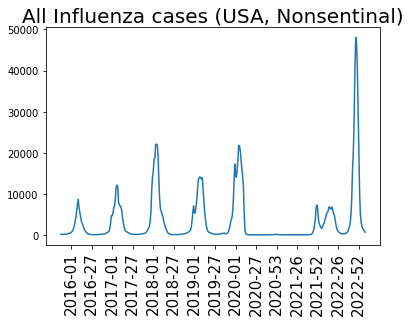

In [17]:
plt.plot(usa_new)
dates = list(usa_new.index)
x_ticks = dates[13:][0::26]
plt.xticks(ticks = x_ticks,rotation=90,size=15)
plt.title("All Influenza cases (USA, Nonsentinal)",size=20)

plt.show()

In [18]:
usa_new.index

Index(['2015-40', '2015-41', '2015-42', '2015-43', '2015-44', '2015-45',
       '2015-46', '2015-47', '2015-48', '2015-49',
       ...
       '2022-51', '2022-52', '2023-01', '2023-02', '2023-03', '2023-04',
       '2023-05', '2023-06', '2023-07', '2023-08'],
      dtype='object', length=386)

In [19]:
fourier = create_all_fourier(52)
dp = DeterministicProcess(index = usa_new.index,
                          constant=True,
                          order=0,
                          seasonal=False,
                          
                          additional_terms=fourier,
                          drop=True,
                         )
X = dp.in_sample()

## USA and AUS

In [20]:
aus_inf_all = flu_net[(flu_net.COUNTRY_CODE =="AUS") ][["MMWRYW","INF_ALL"]]
aus_inf_all = aus_inf_all.set_index("MMWRYW")
aus_inf_all = pd_to_weektime(aus_inf_all)

In [21]:
list(aus_inf_all.index).index(dates[0])

965

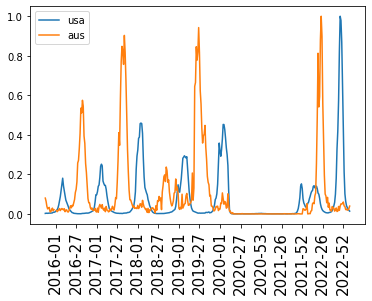

In [22]:
plt.plot(dates,usa_new/max(usa_new.values),label="usa")
plt.plot(dates,aus_inf_all.iloc[965:-1]/max(aus_inf_all.values),label="aus")
#plt.plot(dates,X_lags["INF_ALLlag_25"]/max(aus_inf_all.values),label="aus_shift")
plt.xticks(ticks = x_ticks,rotation=90,size=15)
plt.legend(loc="upper left")
plt.show()

In [23]:
X_lags = create_lags(aus_inf_all,"INF_ALL",51-15,15,1)

In [24]:
X_lags = X_lags.iloc[965:-1]
X_lags_more = create_lags(usa_new,"INF_ALL",51-15,15,1)

In [25]:
X_lags_new = X_lags.join(X_lags_more, on=X_lags.index, how='left', lsuffix='aus', rsuffix='usa')
X_lags = X_lags_new

In [26]:
begin_ = 104
range_ = dates.index("2022-26")
X_train, y_train = X[begin_:range_], usa_new[begin_:range_]
Xlags_train = X_lags[begin_:range_]
X_test, y_test = X[range_:], usa_new[range_:]
Xlags_test = X_lags[range_:]

In [27]:
X_total = X.join(X_lags,on=X.index,lsuffix="_")
X_total_train, X_total_test = X_total[begin_:range_], X_total[range_:]

In [28]:
bh_rf = BoostedHybrid(LinearRegression(),RandomForestRegressor())
bh = BoostedHybrid(LinearRegression(),LinearRegression())
lin_reg = LinearRegression()
rf = RandomForestRegressor()

In [29]:
bh.fit(X_train,Xlags_train,y_train)
bh_rf.fit(X_train,Xlags_train,y_train)
lin_reg.fit(X_total_train,y_train)
rf.fit(X_total_train,y_train)

/var/folders/zh/dvg4994d0_v8dpj_6tb0y44r0000gn/T/ipykernel_15608/2330458734.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_total_train,y_train)


RandomForestRegressor()

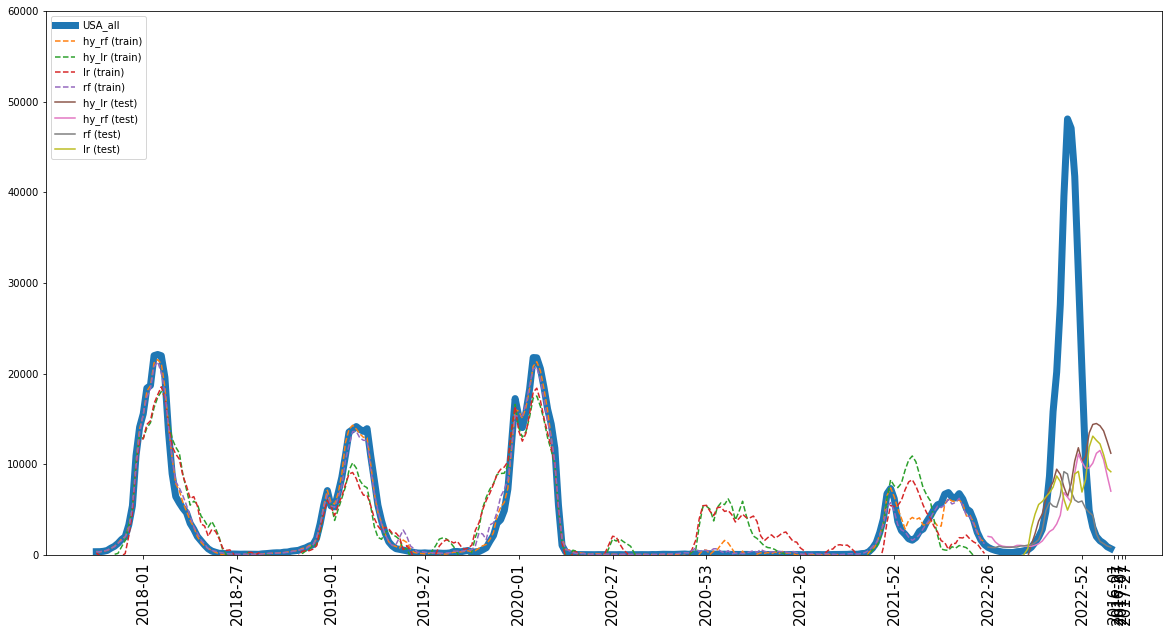

In [30]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.plot(dates[begin_:],usa_new[104:],label="USA_all",linewidth=7)
plt.plot(dates[begin_:range_],bh_rf.predict(X_train,Xlags_train),label = "hy_rf (train)",linestyle="dashed")
plt.plot(dates[begin_:range_],bh.predict(X_train,Xlags_train),label = "hy_lr (train)",linestyle="dashed")
plt.plot(dates[begin_:range_],lin_reg.predict(X_total_train),label = "lr (train)",linestyle="dashed")
plt.plot(dates[begin_:range_],rf.predict(X_total_train),label = "rf (train)",linestyle="dashed")


#plt.plot(dates[range_:],lin_reg.predict(X_test),label="Lin (test)")
plt.plot(dates[range_:],bh.predict(X_test,Xlags_test),label="hy_lr (test)")
plt.plot(dates[range_:],bh_rf.predict(X_test,Xlags_test),label="hy_rf (test)")
plt.plot(dates[range_:],rf.predict(X_total_test),label="rf (test)")
plt.plot(dates[range_:],lin_reg.predict(X_total_test),label="lr (test)")
plt.xticks(ticks = x_ticks,rotation=90,size=15)
plt.ylim([0,6e4])
plt.legend(loc="upper left")
plt.show()

## Other regions

In [31]:
europe_inf_all = flu_net[flu_net.WHOREGION=="EUR"][["MMWRYW","COUNTRY_CODE","INF_ALL"]].groupby("MMWRYW").sum()
#europe_inf_all = europe_inf_all.set_index("MMWRYW")
europe_inf_all = pd_to_weektime(europe_inf_all)

In [32]:
africa_inf_all = flu_net[flu_net.WHOREGION=="AFR"][["MMWRYW","COUNTRY_CODE","INF_ALL"]].groupby("MMWRYW").sum()
africa_inf_all = pd_to_weektime(africa_inf_all)

sear_inf_all = flu_net[flu_net.WHOREGION=="SEAR"][["MMWRYW","COUNTRY_CODE","INF_ALL"]].groupby("MMWRYW").sum()
sear_inf_all = pd_to_weektime(sear_inf_all)

wpr_inf_all = flu_net[flu_net.WHOREGION=="WPR"][["MMWRYW","COUNTRY_CODE","INF_ALL"]].groupby("MMWRYW").sum()
wpr_inf_all = pd_to_weektime(wpr_inf_all)

emr_inf_all = flu_net[flu_net.WHOREGION=="EMR"][["MMWRYW","COUNTRY_CODE","INF_ALL"]].groupby("MMWRYW").sum()
emr_inf_all = pd_to_weektime(emr_inf_all)

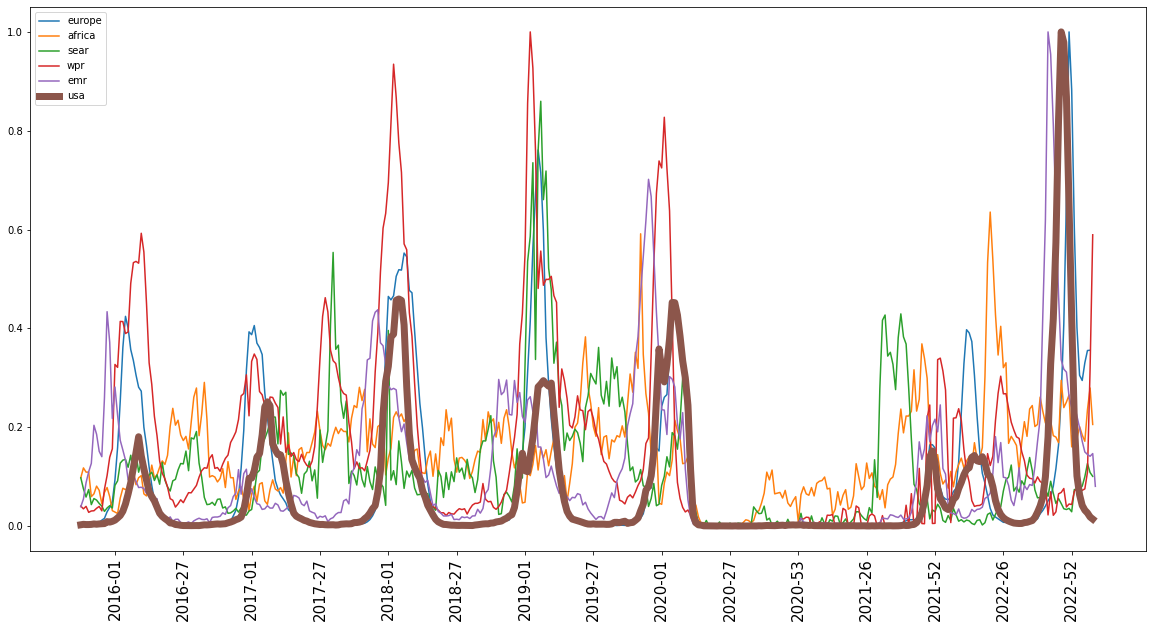

In [33]:
plt.plot(europe_inf_all[list(europe_inf_all.index).index(dates[0]):-1]/europe_inf_all.max(),label="europe")
plt.plot(africa_inf_all[list(africa_inf_all.index).index(dates[0]):-1]/africa_inf_all.max(),label="africa")
plt.plot(sear_inf_all[list(sear_inf_all.index).index(dates[0]):-1]/sear_inf_all.max(),label="sear")
plt.plot(wpr_inf_all[list(wpr_inf_all.index).index(dates[0]):-1]/wpr_inf_all.max(),label="wpr")
plt.plot(emr_inf_all[list(emr_inf_all.index).index(dates[0]):-1]/emr_inf_all.max(),label="emr")



plt.plot(dates,usa_new/usa_new.max(),label="usa",linewidth=7)
#plt.plot(dates,aus_inf_all.iloc[965:-1]/max(aus_inf_all.values),label="aus")
#plt.plot(dates,X_lags["INF_ALLlag_25"]/max(aus_inf_all.values),label="aus_shift")
plt.xticks(ticks = x_ticks,rotation=90,size=15)
plt.legend(loc="upper left")
plt.show()

In [34]:
flu_net["WHOREGION"].unique()

array(['SEAR', 'WPR', 'AMR', 'AFR', 'EUR', 'EMR'], dtype=object)

## find correlated features

In [35]:
usa_new

INF_ALL
2015-40    127.0
2015-41    170.0
2015-42    149.0
2015-43    150.0
2015-44    165.0
2015-45    208.0
2015-46    182.0
2015-47    211.0
2015-48    226.0
2015-49    246.0
2015-50    436.0
2015-51    386.0
2015-52    464.0
2016-01    580.0
2016-02    795.0
2016-03   1031.0
2016-04   1447.0
2016-05   2159.0
2016-06   3129.0
2016-07   4227.0
2016-08   5686.0
2016-09   7152.0
2016-10   8697.0
2016-11   6837.0
2016-12   5571.0
2016-13   4479.0
2016-14   3361.0
2016-15   2870.0
2016-16   2452.0
2016-17   1844.0
2016-18   1249.0
2016-19    942.0
2016-20    729.0
2016-21    547.0
2016-22    308.0
2016-23    277.0
2016-24    153.0
2016-25    127.0
2016-26     77.0
2016-27     54.0
2016-28     55.0
2016-29     50.0
2016-30     45.0
2016-31     53.0
2016-32     52.0
2016-33     48.0
2016-34     88.0
2016-35    119.0
2016-36    113.0
2016-37    132.0
2016-38    164.0
2016-39    189.0
2016-40    210.0
2016-41    191.0
2016-42    212.0
2016-43    231.0
2016-44    319.0
2016-45    392.0
2016-46    491.0
2016-47    620.0
2016-48    715.0
2016-49    876.0
2016-50   1569.0
2016-51   2904.0
2016-52   4658.0
2017-01   4674.0
2017-02   5411.0
2017-03   6717.0
2017-04   7051.0
2017-05   8876.0
2017-06  11592.0
2017-07  12098.0
2017-08  11715.0
2017-09   7994.0
2017-10   7417.0
2017-11   6966.0
2017-12   6936.0
2017-13   6003.0
2017-14   4429.0
2017-15   3185.0
2017-16   2142.0
2017-17   1272.0
2017-18    960.0
2017-19    816.0
2017-20    695.0
2017-21    558.0
2017-22    485.0
2017-23    361.0
2017-24    293.0
2017-25    224.0
2017-26    190.0
2017-27    154.0
2017-28    160.0
2017-29    132.0
2017-30    122.0
2017-31    131.0
2017-32    131.0
2017-33    102.0
2017-34    117.0
2017-35    182.0
2017-36    196.0
2017-37    220.0
2017-38    212.0
2017-39    232.0
2017-40    342.0
2017-41    346.0
2017-42    388.0
2017-43    475.0
2017-44    722.0
2017-45    929.0
2017-46   1261.0
2017-47   1689.0
2017-48   1988.0
2017-49   3306.0
2017-50   5404.0
2017-51  10935.0
2017-52  14094.0
2018-01  15553.0
2018-02  18395.0
2018-03  18687.0
2018-04  21984.0
2018-05  22108.0
2018-06  21974.0
2018-07  19581.0
2018-08  13577.0
2018-09   8964.0
2018-10   6431.0
2018-11   5733.0
2018-12   5126.0
2018-13   4635.0
2018-14   3469.0
2018-15   2818.0
2018-16   2019.0
2018-17   1546.0
2018-18   1070.0
2018-19    658.0
2018-20    412.0
2018-21    282.0
2018-22    165.0
2018-23    153.0
2018-24    116.0
2018-25     87.0
2018-26     86.0
2018-27     69.0
2018-28     64.0
2018-29     72.0
2018-30     67.0
2018-31     60.0
2018-32     65.0
2018-33     54.0
2018-34    104.0
2018-35    131.0
2018-36    171.0
2018-37    203.0
2018-38    224.0
2018-39    221.0
2018-40    289.0
2018-41    306.0
2018-42    400.0
2018-43    441.0
2018-44    489.0
2018-45    644.0
2018-46    772.0
2018-47    973.0
2018-48   1107.0
2018-49   1812.0
2018-50   3436.0
2018-51   5480.0
2018-52   7089.0
2019-01   5390.0
2019-02   5293.0
2019-03   6849.0
2019-04   8552.0
2019-05  10948.0
2019-06  13551.0
2019-07  13822.0
2019-08  14155.0
2019-09  13852.0
2019-10  13622.0
2019-11  13923.0
2019-12  10936.0
2019-13   8257.0
2019-14   5471.0
2019-15   3760.0
2019-16   2402.0
2019-17   1436.0
2019-18    966.0
2019-19    679.0
2019-20    601.0
2019-21    534.0
2019-22    441.0
2019-23    351.0
2019-24    263.0
2019-25    199.0
2019-26    189.0
2019-27    215.0
2019-28    183.0
2019-29    185.0
2019-30    189.0
2019-31    189.0
2019-32    166.0
2019-33    172.0
2019-34    210.0
2019-35    362.0
2019-36    366.0
2019-37    332.0
2019-38    415.0
2019-39    475.0
2019-40    260.0
2019-41    327.0
2019-42    359.0
2019-43    555.0
2019-44    777.0
2019-45   1489.0
2019-46   2124.0
2019-47   3484.0
2019-48   3872.0
2019-49   4887.0
2019-50   7255.0
2019-51  12276.0
2019-52  17244.0
2020-01  15309.0
2020-02  14037.0
2020-03  15732.0
2020-04  18242.0
2020-05  21773.0
2020-06  21747.0
2020-07  20552.0
2020-08  18469.0
2020-09  16076.0
2020-10  14428.0
2020-11  11767.0
2020-12   5483.0
2020-13   1039.0
2020-14    318

In [37]:
aus_inf_all

INF_ALL
1996-52      1.0
1997-01      0.0
1997-02      0.0
1997-03      0.0
1997-04      0.0
1997-05      0.0
1997-06      0.0
1997-07      0.0
1997-08      0.0
1997-09      0.0
1997-10      0.0
1997-11      0.0
1997-12      0.0
1997-13      0.0
1997-14      0.0
1997-15      0.0
1997-16      0.0
1997-17      0.0
1997-18      0.0
1997-19      0.0
1997-20      5.0
1997-21      0.0
1997-22      0.0
1997-23      8.0
1997-24      0.0
1997-25      8.0
1997-26     16.0
1997-27     12.0
1997-28      4.0
1997-29     12.0
1997-30      3.0
1997-31     10.0
1997-32      8.0
1997-33     12.0
1997-34      9.0
1997-35      2.0
1997-36      4.0
1997-37      0.0
1997-38      2.0
1997-39      0.0
1997-40      0.0
1997-41      0.0
1997-42      0.0
1997-43      0.0
1997-44      0.0
1997-45      0.0
1997-46      0.0
1997-47      1.0
1997-48      0.0
1997-49      0.0
1997-50      0.0
1997-51      6.0
1997-52      0.0
1997-53      0.0
1998-01      0.0
1998-02      0.0
1998-03      0.0
1998-04      0.0
1998-05      0.0
1998-06      0.0
1998-07      0.0
1998-08      0.0
1998-09      0.0
1998-10      0.0
1998-11      0.0
1998-12      0.0
1998-13      0.0
1998-14      0.0
1998-15      0.0
1998-16      0.0
1998-17      1.0
1998-18      1.0
1998-19      1.0
1998-20      1.0
1998-21      1.0
1998-22      1.0
1998-23      6.0
1998-24      3.0
1998-25      7.0
1998-26     22.0
1998-27     39.0
1998-28     47.0
1998-29     35.0
1998-30     26.0
1998-31     61.0
1998-32     27.0
1998-33     33.0
1998-34     45.0
1998-35     28.0
1998-36     18.0
1998-37      6.0
1998-38      1.0
1998-39      2.0
1998-40      1.0
1998-41      1.0
1998-42      0.0
1998-43      3.0
1998-44      0.0
1998-45      0.0
1998-46      0.0
1998-47      0.0
1998-48      1.0
1998-49      0.0
1998-50      0.0
1998-51      1.0
1998-52      3.0
1999-01      0.0
1999-02      1.0
1999-03      1.0
1999-04      0.0
1999-05      4.0
1999-06      3.0
1999-07      2.0
1999-08      0.0
1999-09      0.0
1999-10      0.0
1999-11      0.0
1999-12      0.0
1999-13      3.0
1999-14      1.0
1999-15      1.0
1999-16      1.0
1999-17      3.0
1999-18      2.0
1999-19     16.0
1999-20      7.0
1999-21     18.0
1999-22     20.0
1999-23     23.0
1999-24     64.0
1999-25     47.0
1999-26     61.0
1999-27     47.0
1999-28     42.0
1999-29     33.0
1999-30     49.0
1999-31     26.0
1999-32     21.0
1999-33     14.0
1999-34     10.0
1999-35     11.0
1999-36      7.0
1999-37      4.0
1999-38     15.0
1999-39      4.0
1999-40      5.0
1999-41      4.0
1999-42      4.0
1999-43      0.0
1999-44      3.0
1999-45      1.0
1999-46      0.0
1999-47      0.0
1999-48      4.0
1999-49      1.0
1999-50      1.0
1999-51      0.0
1999-52      1.0
2000-01      1.0
2000-02      1.0
2000-03      2.0
2000-04      1.0
2000-05      1.0
2000-06      1.0
2000-07      2.0
2000-08      0.0
2000-09      0.0
2000-10      0.0
2000-11      0.0
2000-12      0.0
2000-13      NaN
2000-14      0.0
2000-15      0.0
2000-16      1.0
2000-17      1.0
2000-18      0.0
2000-19      0.0
2000-20      1.0
2000-21      0.0
2000-22      0.0
2000-23      2.0
2000-24      7.0
2000-25      5.0
2000-26      3.0
2000-27      5.0
2000-28     14.0
2000-29     34.0
2000-30     37.0
2000-31     29.0
2000-32     36.0
2000-33     53.0
2000-34     72.0
2000-35     54.0
2000-36     40.0
2000-37     32.0
2000-38     18.0
2000-39     15.0
2000-40     25.0
2000-41     10.0
2000-42      5.0
2000-43      1.0
2000-44      4.0
2000-45      1.0
2000-46      0.0
2000-47      0.0
2000-48      0.0
2000-49      0.0
2000-50      0.0
2000-51      NaN
2000-52      0.0
2001-01      2.0
2001-02      0.0
2001-03      0.0
2001-04      0.0
2001-05      0.0
2001-06      0.0
2001-07      0.0
2001-08      0.0
2001-09      0.0
2001-10      2.0
2001-11      1.0
2001-12      0.0
2001-13      1.0
2001-15      0.0
2001-16      0.0
2001-17      0.0
2001-18      NaN
2001-19      NaN
2001-20      3.0
2001-21      NaN
2001-22      NaN
2001-23      NaN
2001-24      1.0
2001-25      2.0
2001-26      2

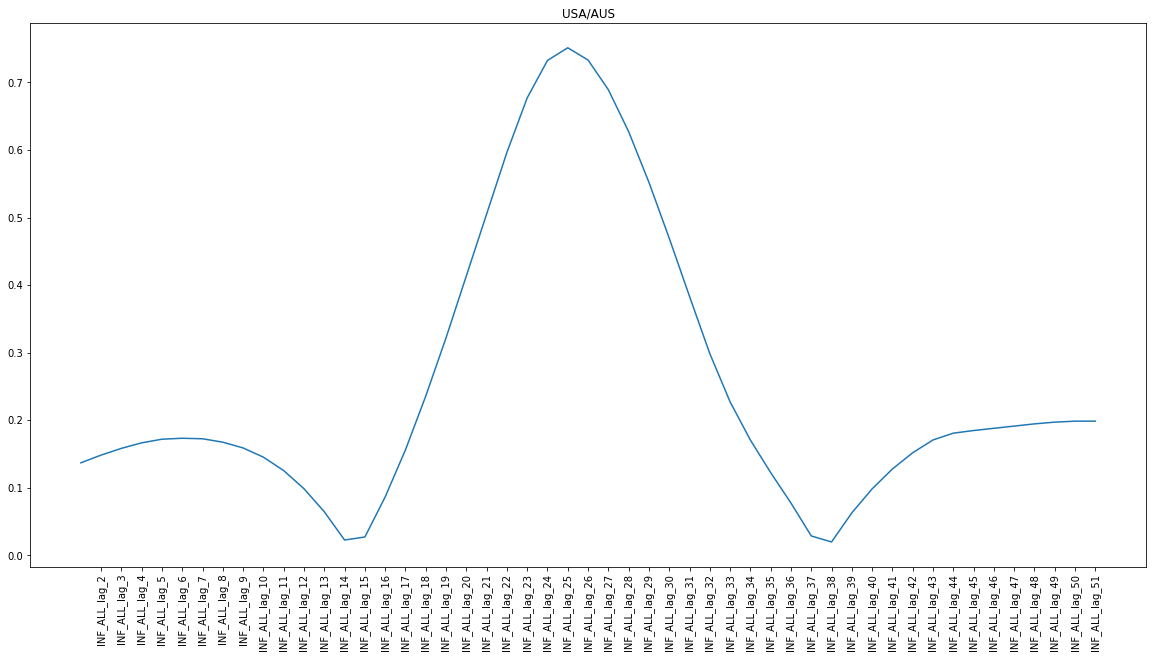

In [38]:
plot_year_lags(usa_new,aus_inf_all,"INF_ALL","USA/AUS")

In [39]:
country_codes = flu_net["COUNTRY_CODE"].unique()

In [40]:
len(country_codes)

181

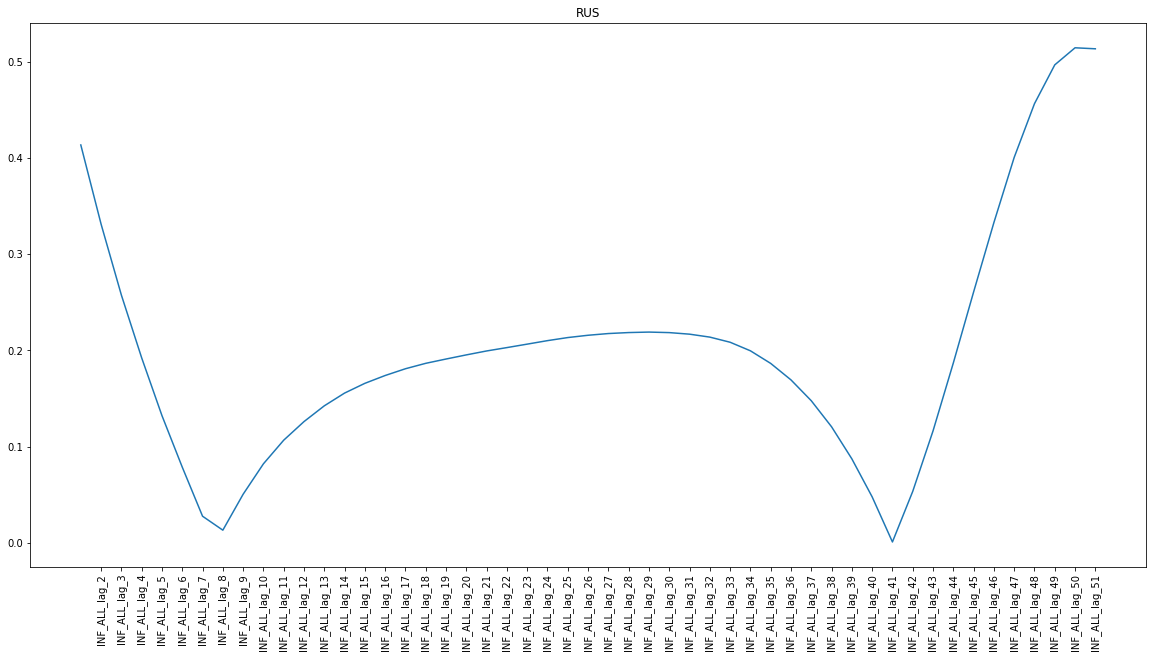

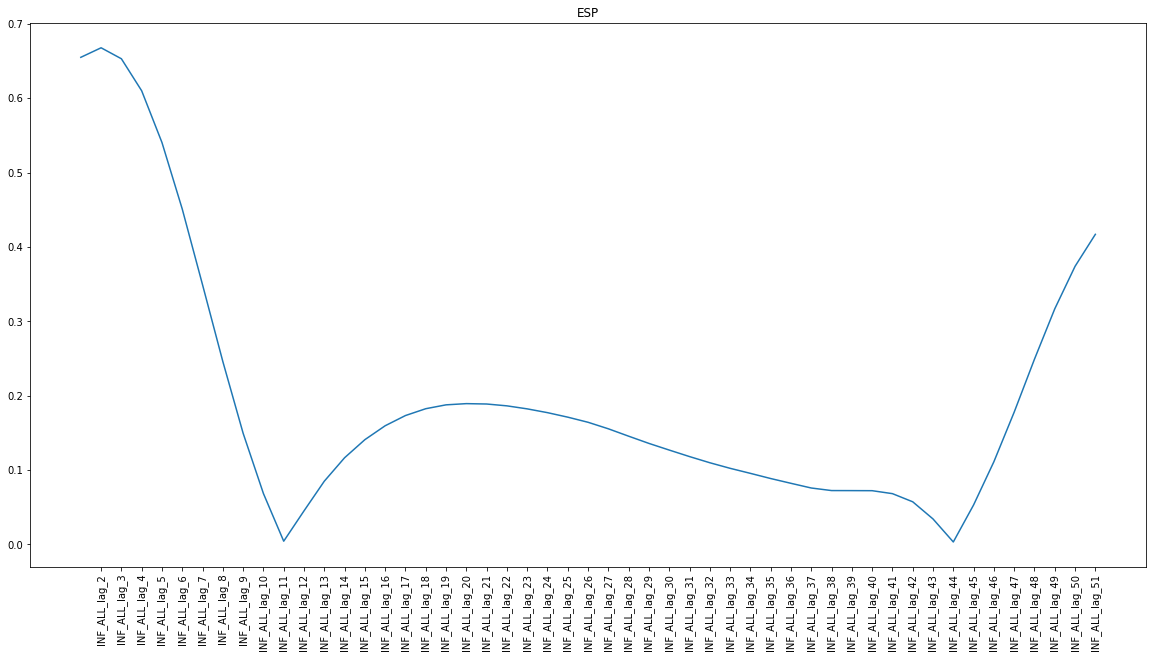

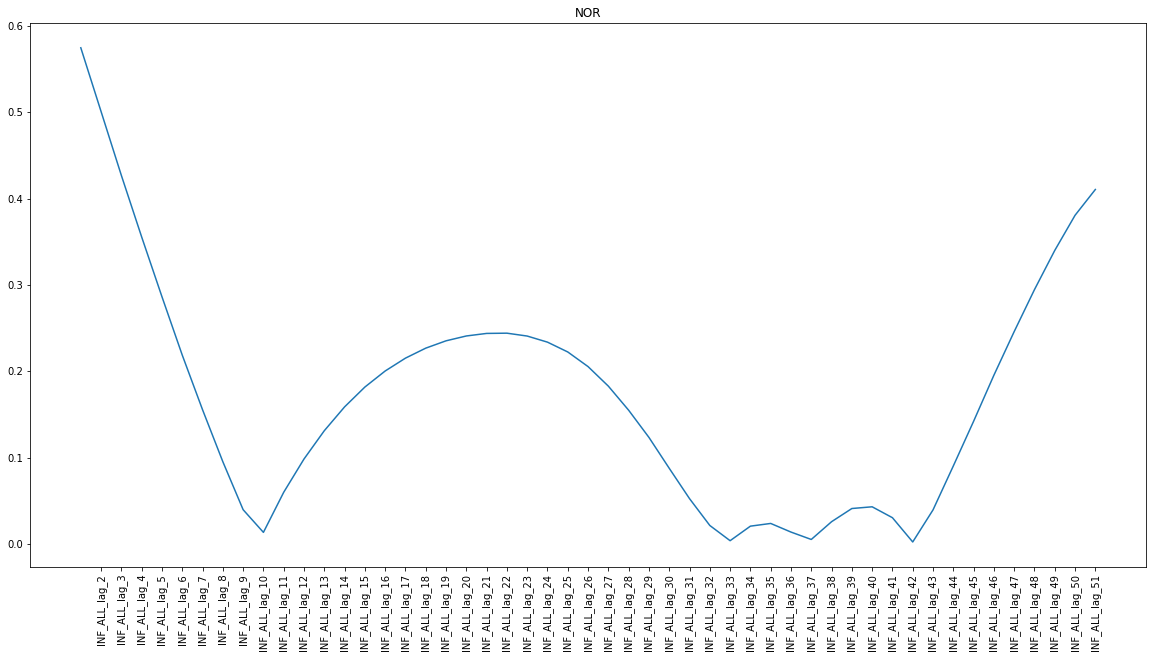

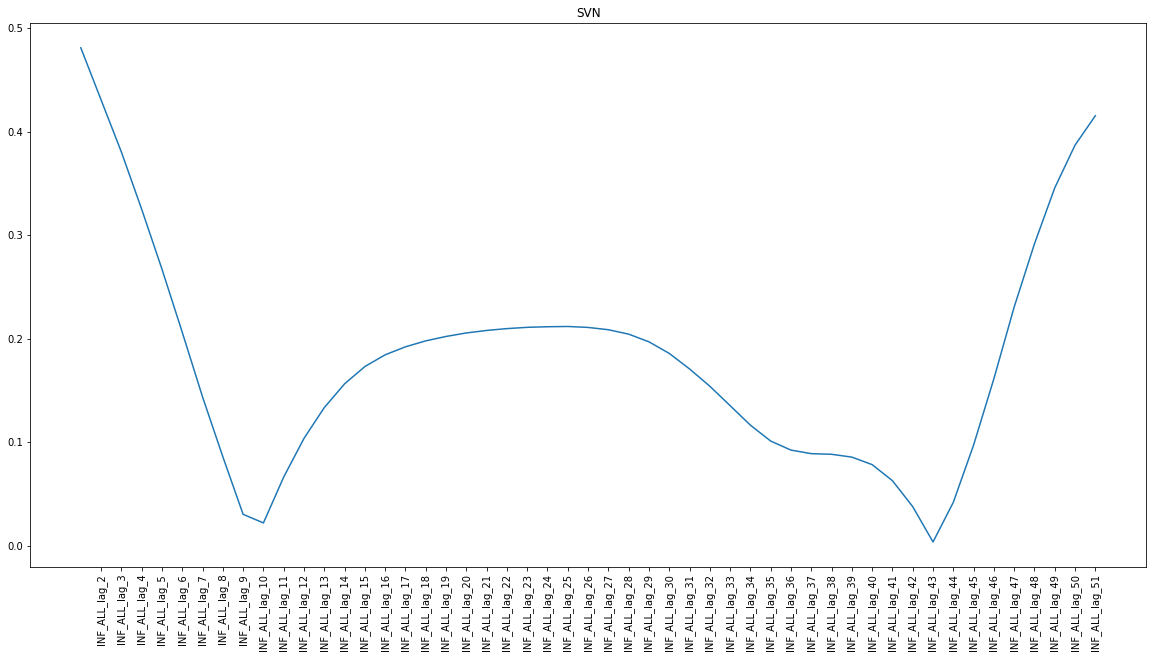

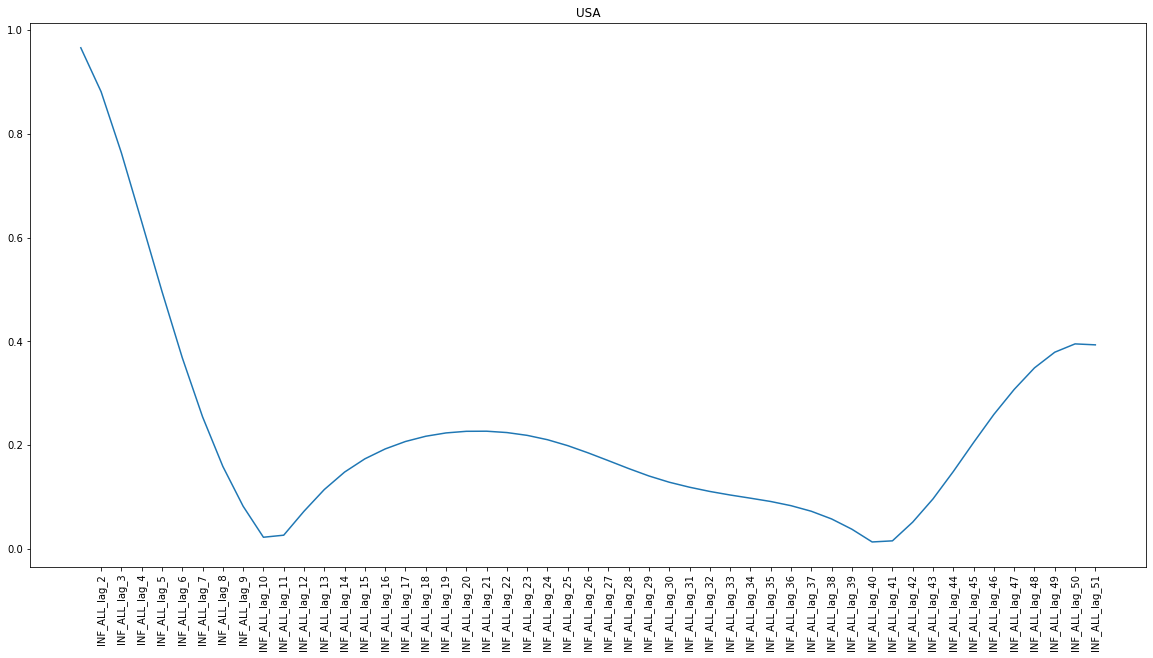

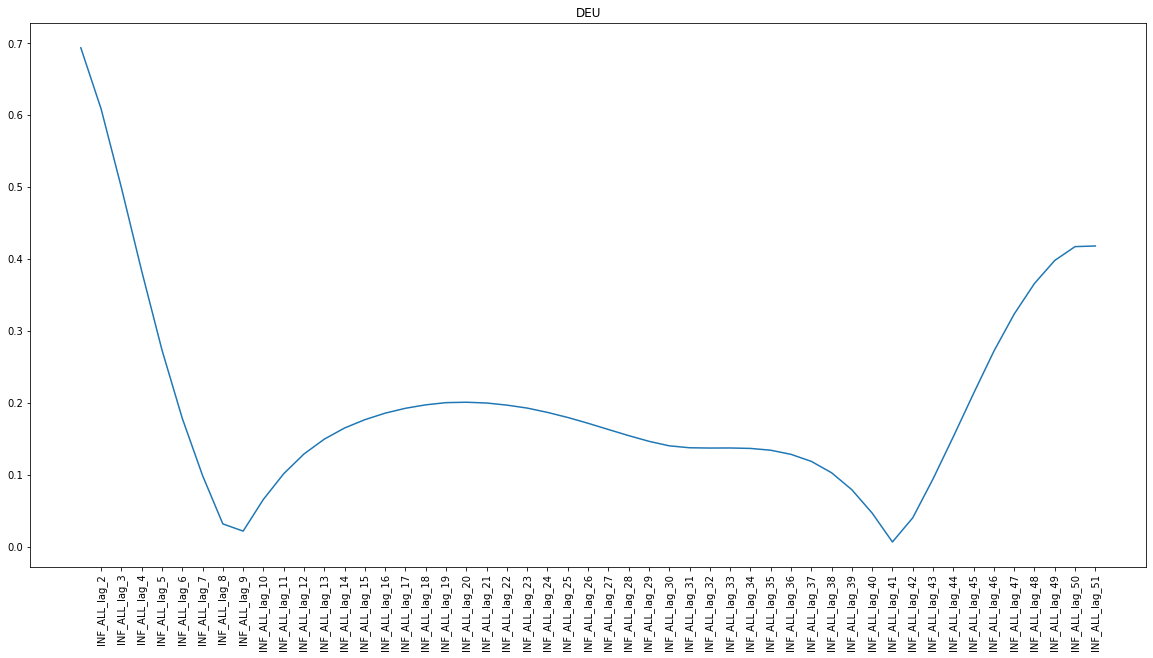

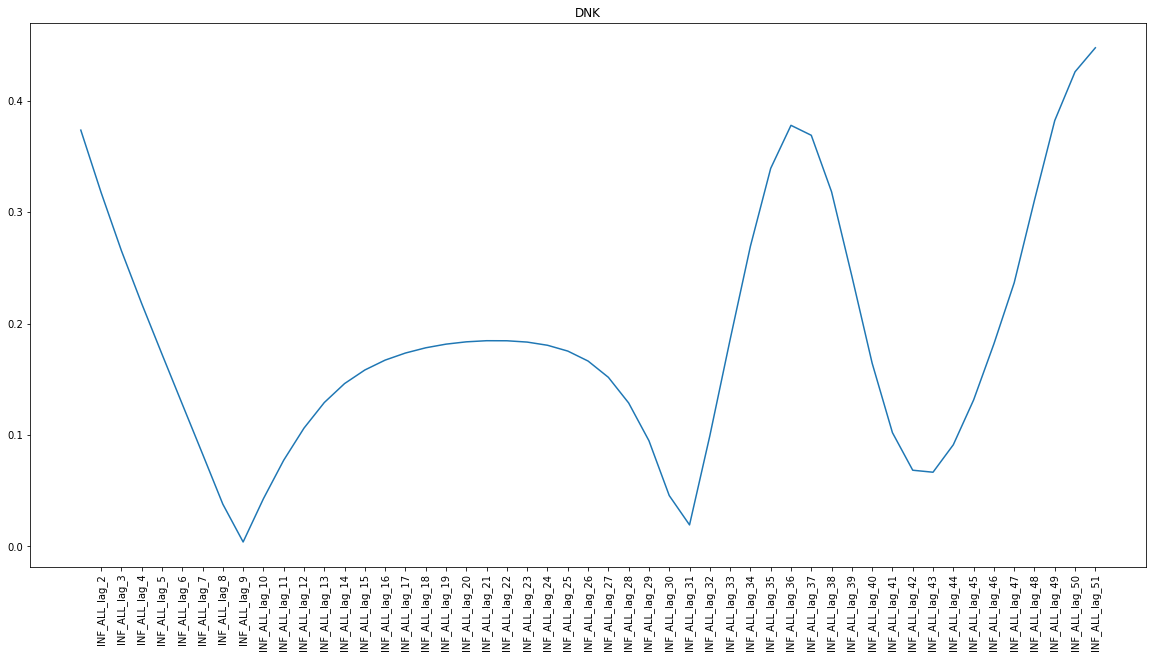

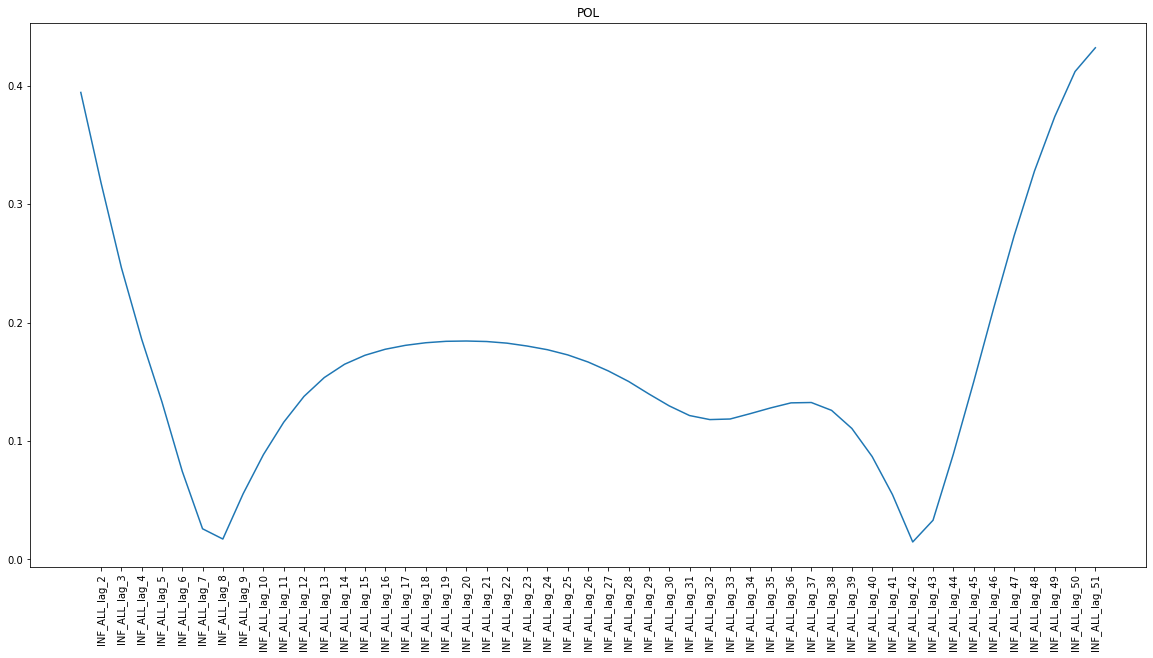

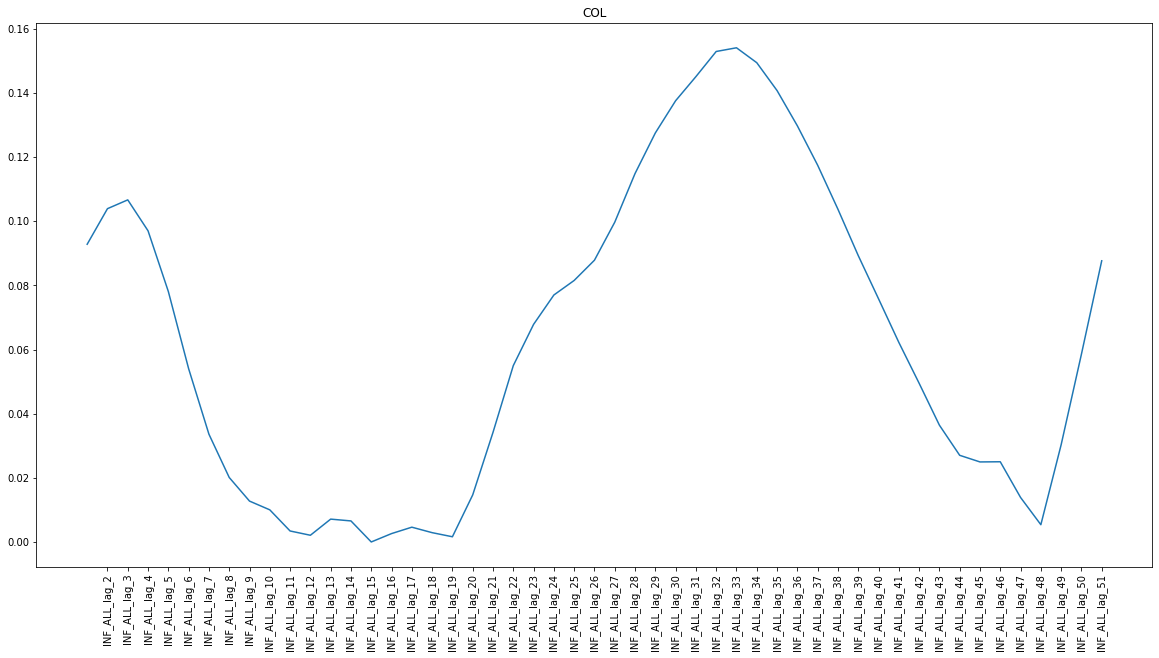

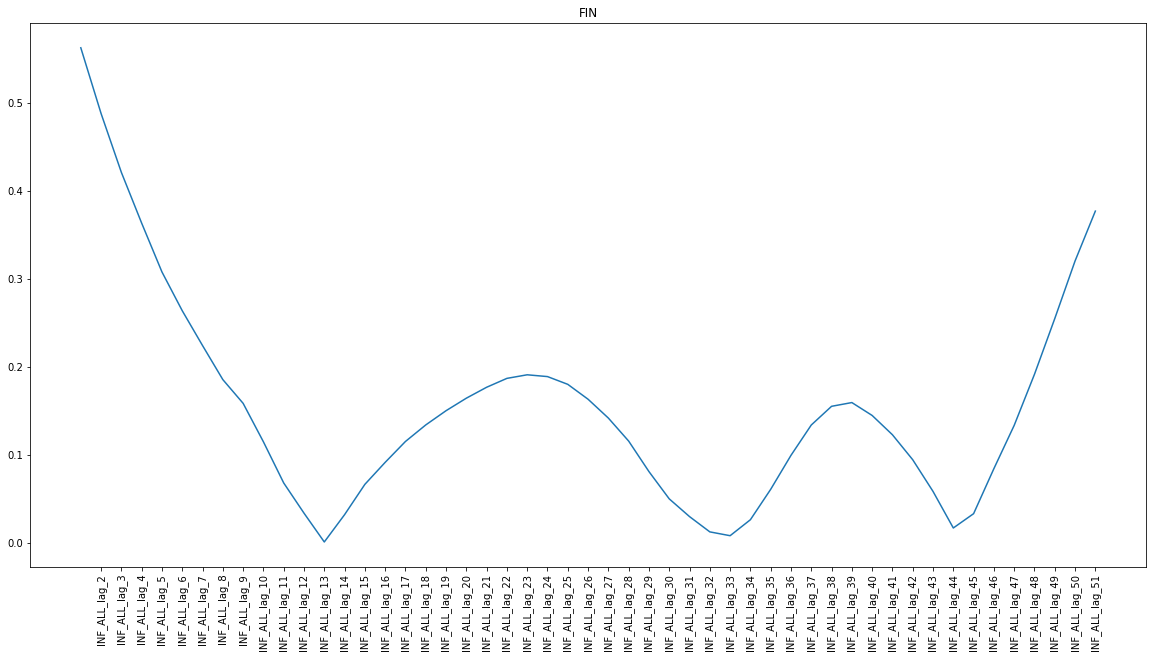

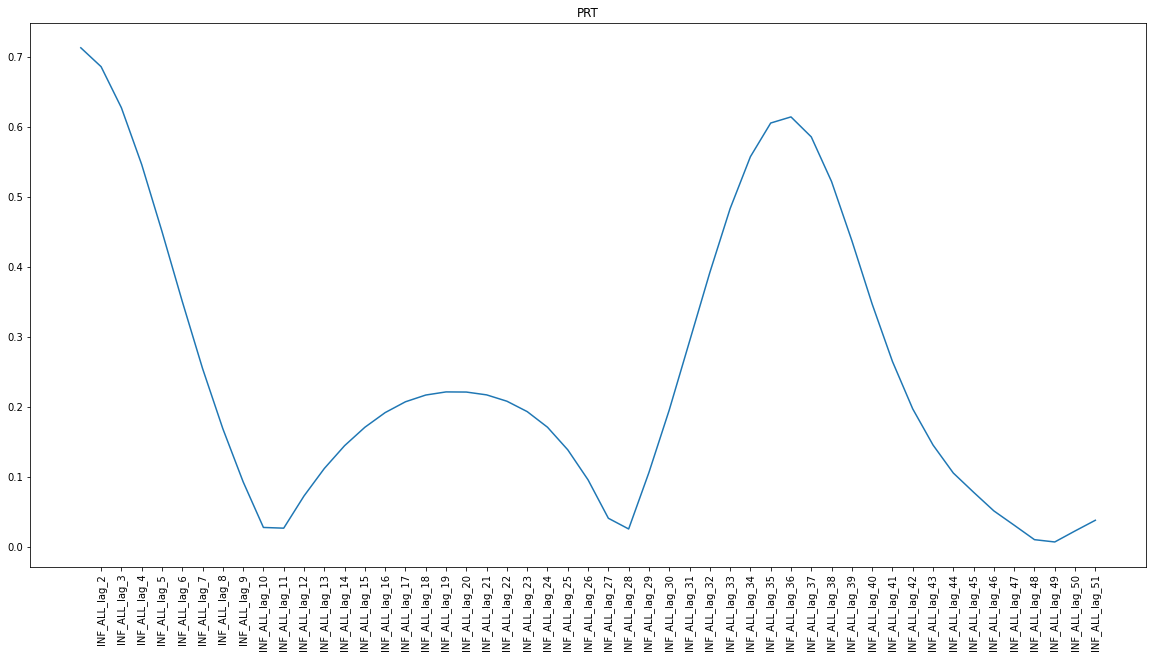

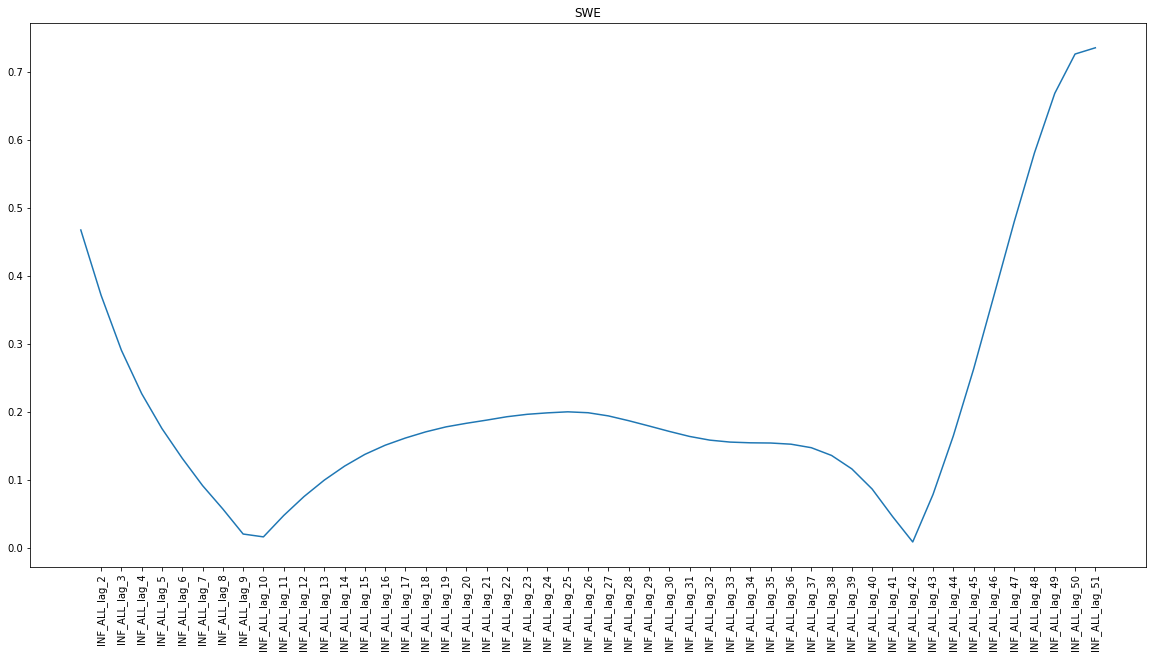

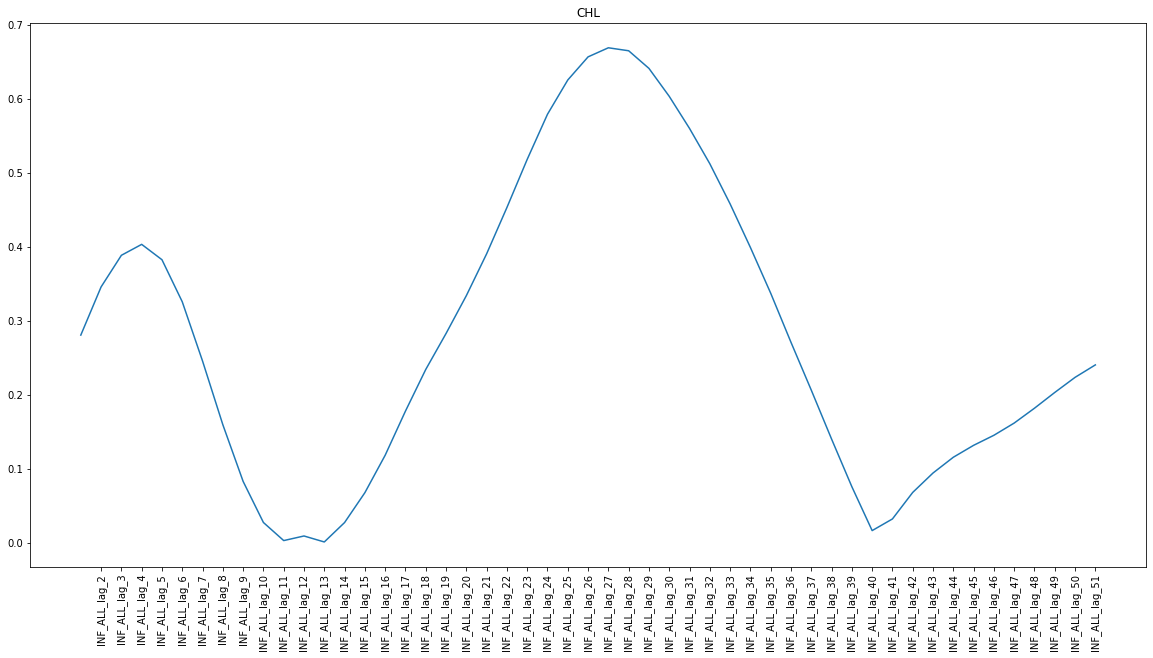

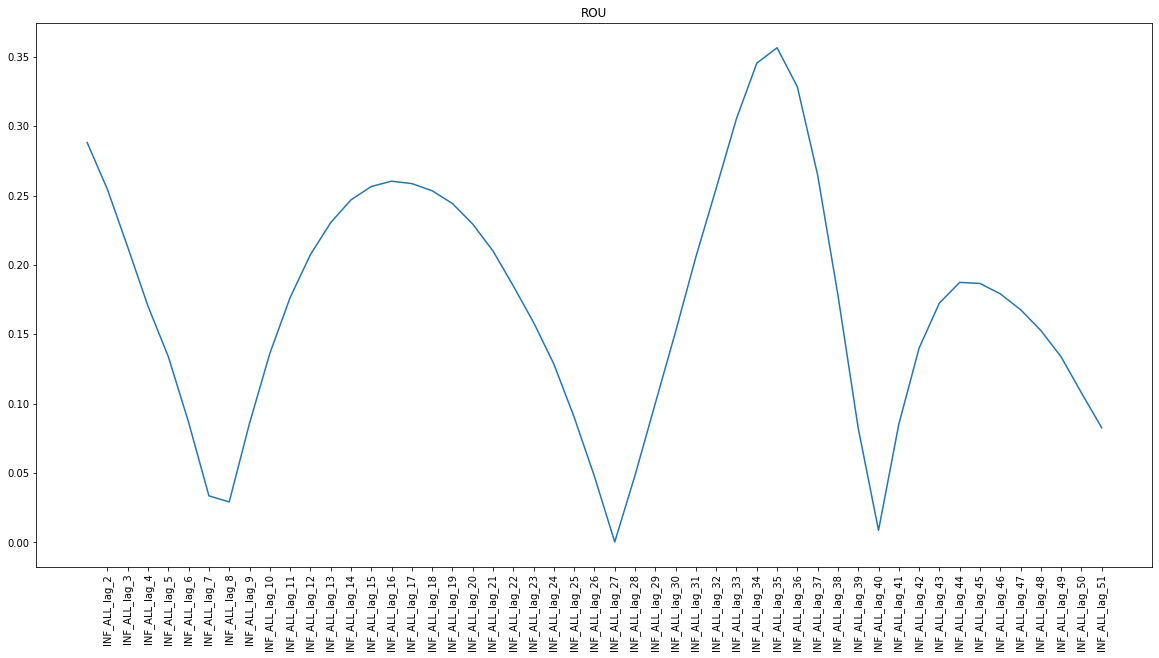

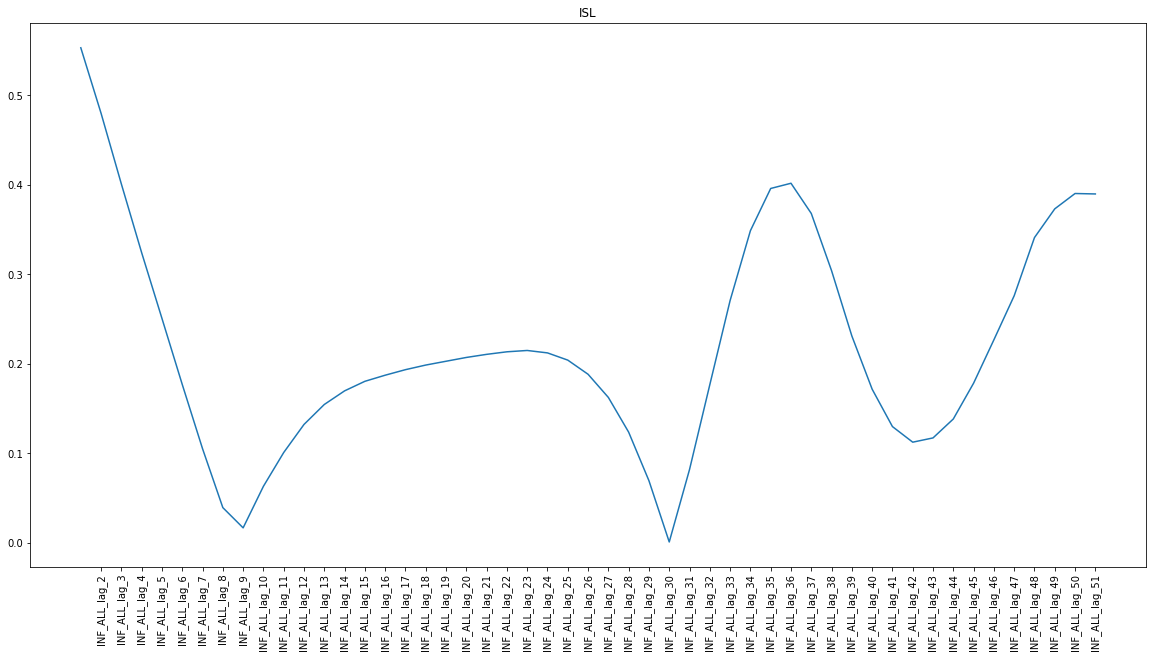

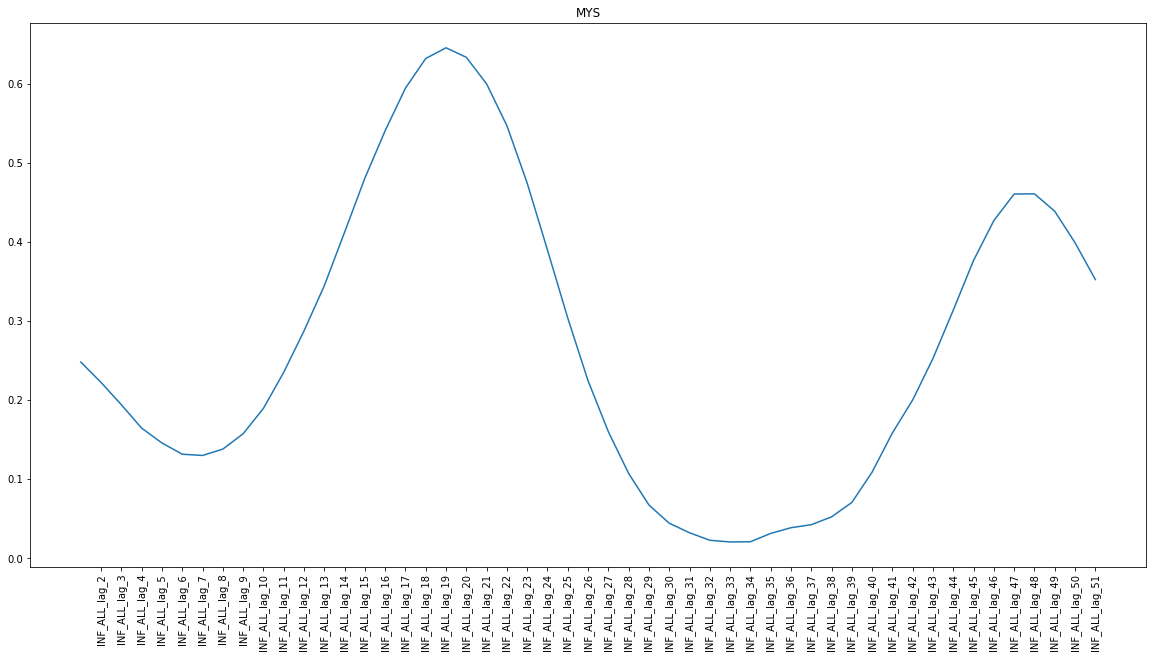

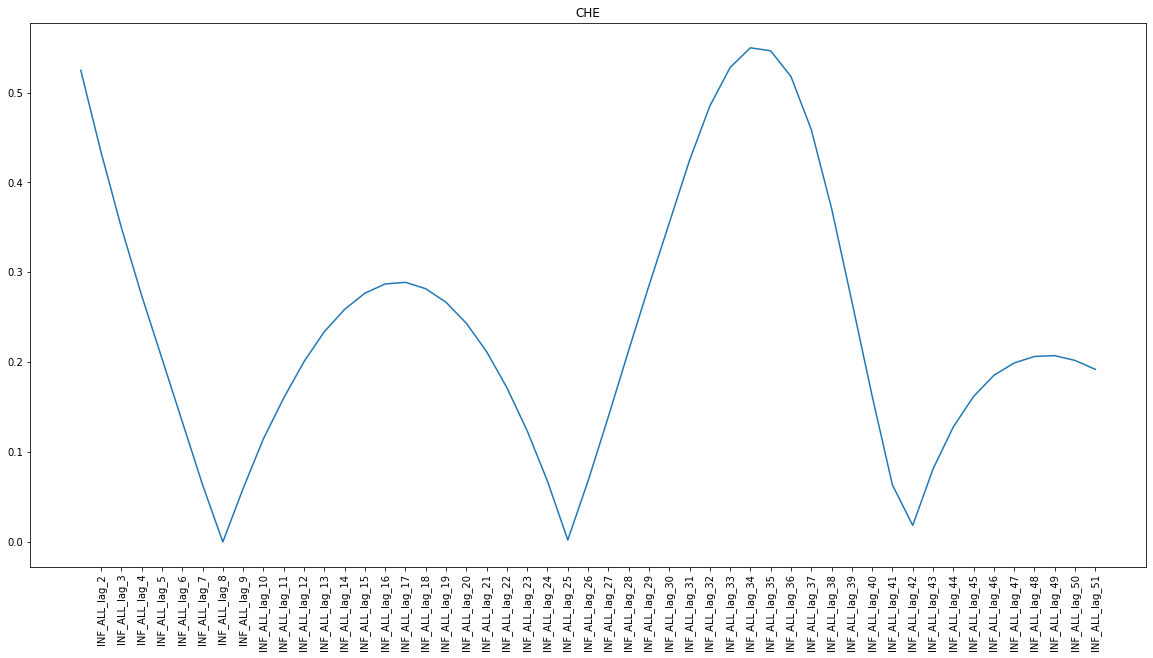

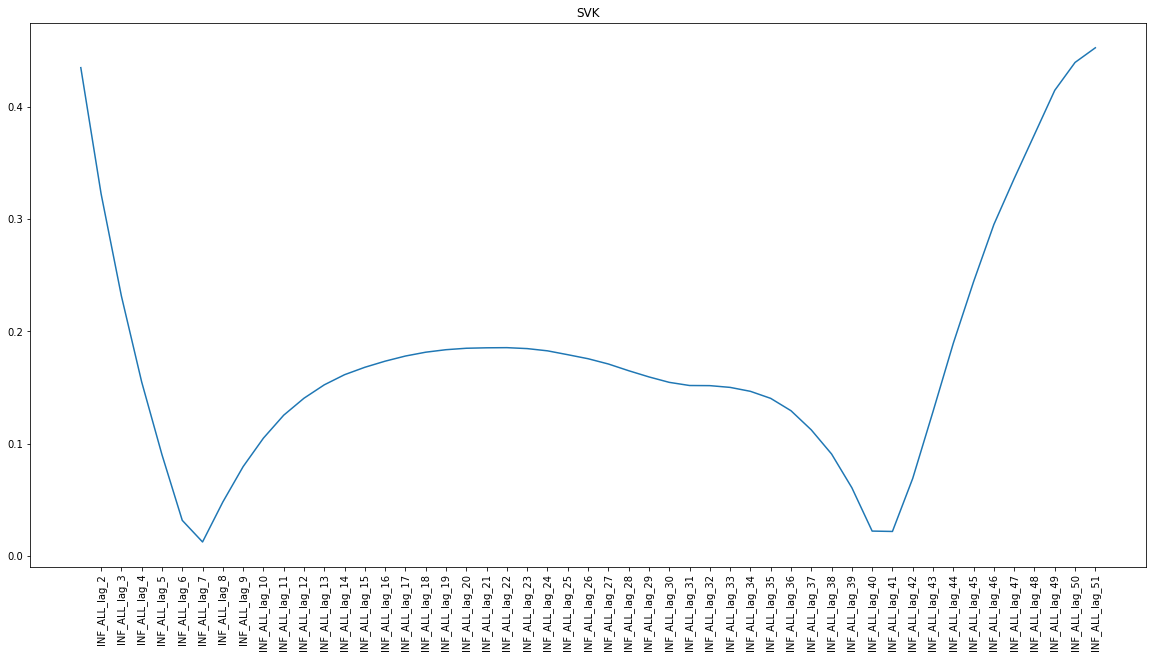

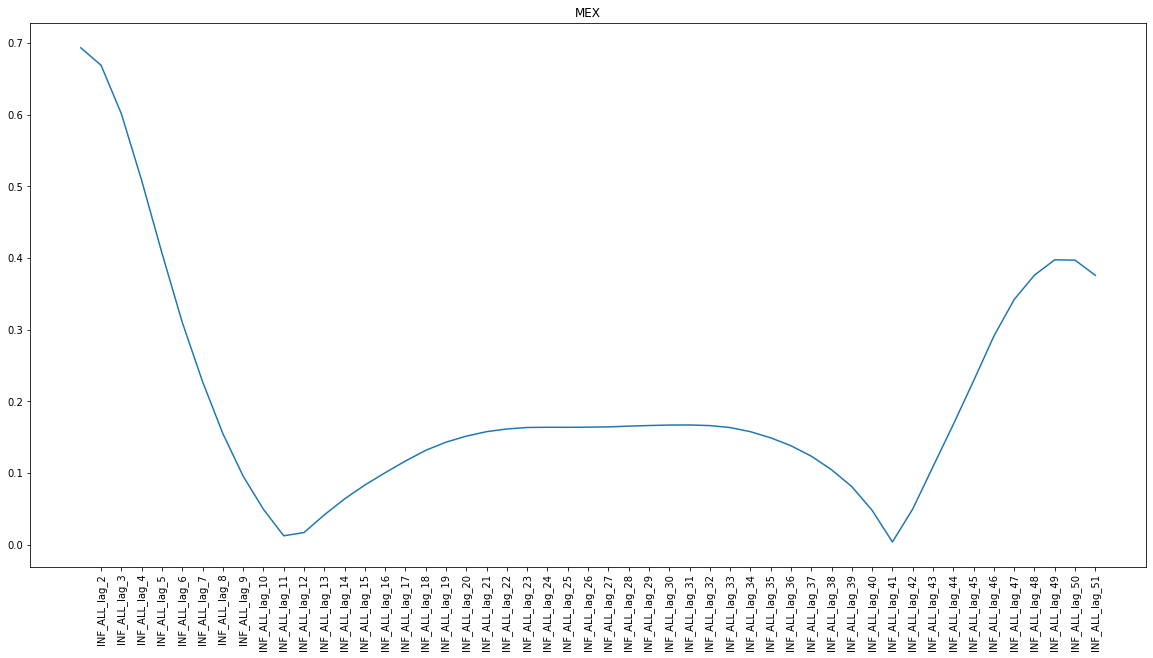

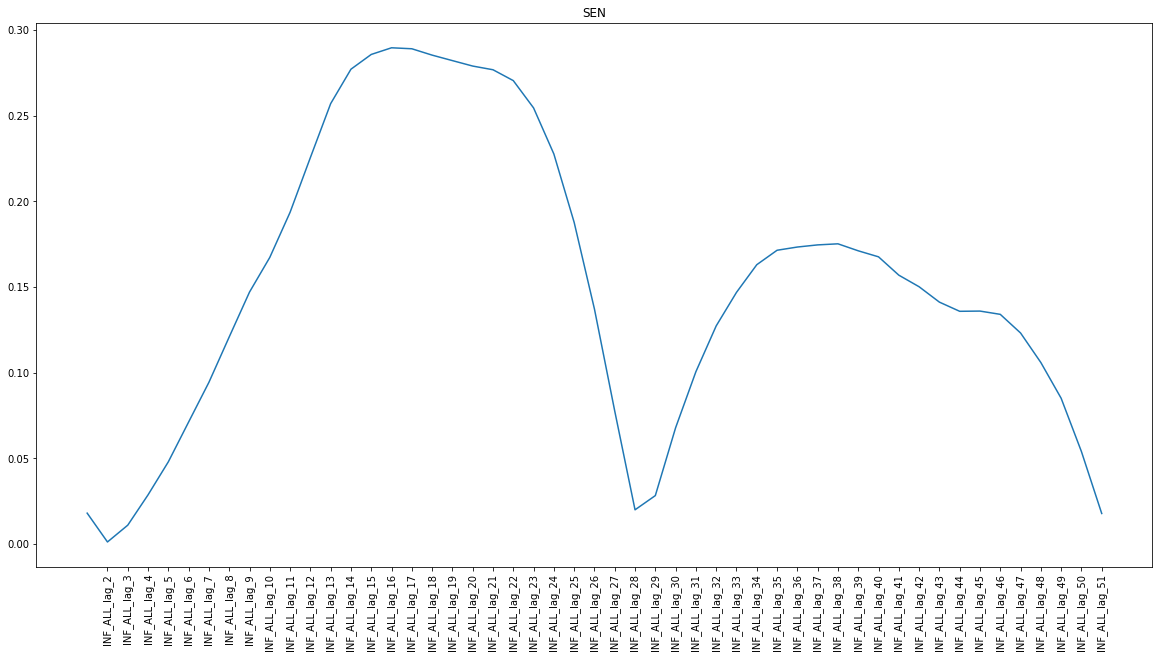

In [41]:
for country in flu_net["COUNTRY_CODE"].value_counts().index[:20]:
    country_inf_all = prep_country(country,"INF_ALL")
    plot_year_lags(usa_new,country_inf_all,"INF_ALL",country)
    

In [42]:
lag_country_list = flu_net["COUNTRY_CODE"].value_counts().index[:20]

In [43]:
lag_country_list = flu_net["COUNTRY_CODE"].value_counts().index
country_keep = []
usa_new_range = usa_new[range_:-1]
for country in lag_country_list:
    country_inf_all = prep_country(country,"INF_ALL")
    if "2022-26" in list(country_inf_all.index):
        ind_start = list(country_inf_all.index).index("2022-26")
        #ind_end = list(country_inf_all.index).index(dates[-1])
        country_inf_all = country_inf_all[ind_start:]


        lags = create_lags(country_inf_all,"INF_ALL",51-15,15,1)

        new_df = usa_new_range.join(lags, on=usa_new_range.index)
        corr = new_df.corr()["INF_ALL"].drop(["INF_ALL"])


        most_corr = abs(corr).max()
        if most_corr > 0.5:
            country_keep.append(country)
            print(country)

RUS
NOR
USA
POL
COL
SWE
CHL
MYS
SEN
AUS
JPN
HKG
PER
PRY
CAN
ZAF
MDG
THA
PHL
URY
EGY
CRI
KOR
PAN
ECU
BOL
JAM
LKA
CHN
NIC
NPL
KEN
UGA
NER
IDN
CIV
TZA
BGD
JOR
VEN
QAT
NGA
MLI
MUS
ETH
BHR
CAF
BLZ
TLS
MDV
MRT
SAU
GIN
ARE


In [44]:
len(country_keep)

54

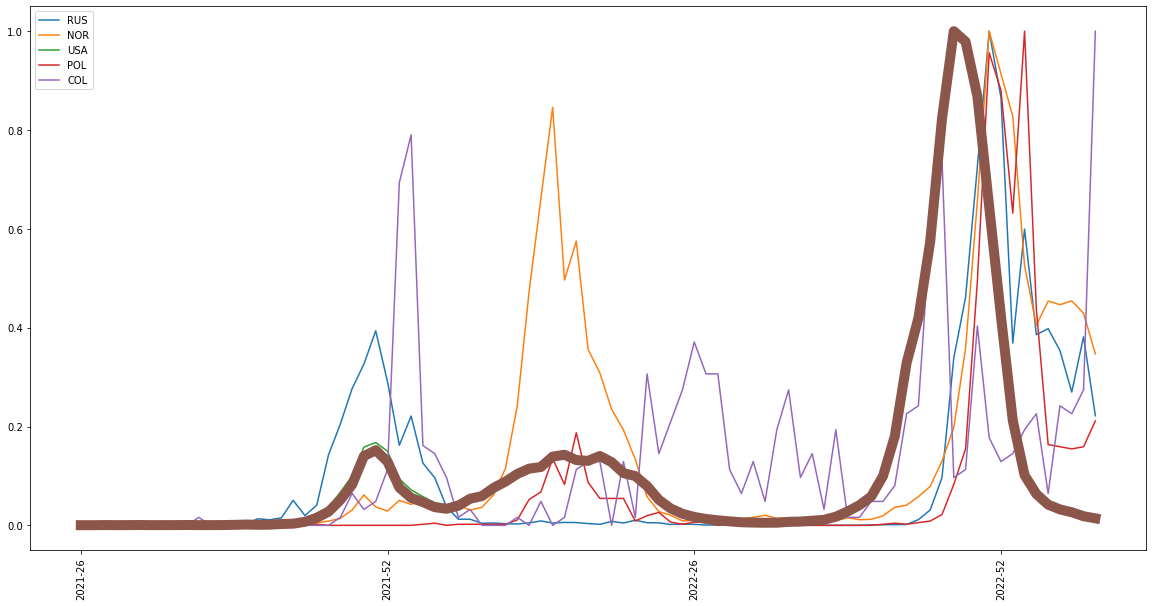

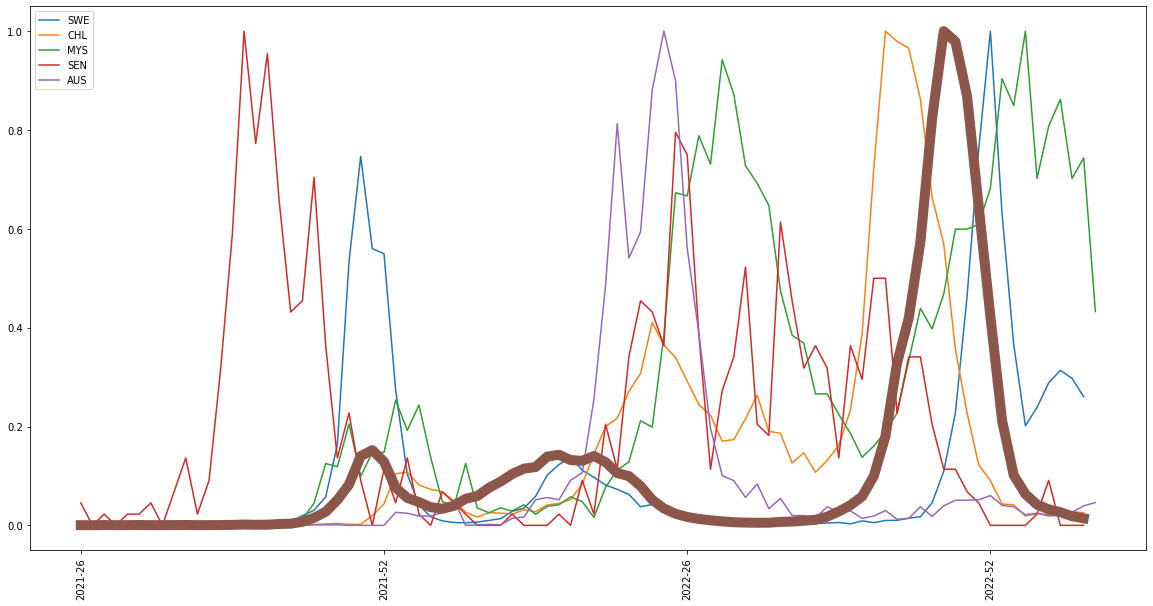

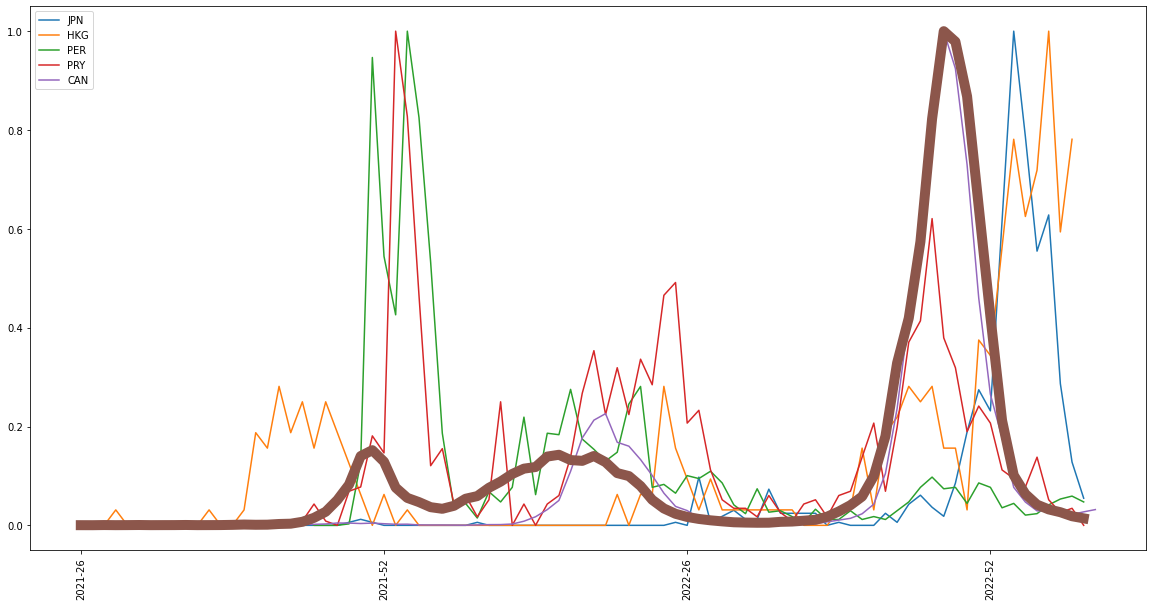

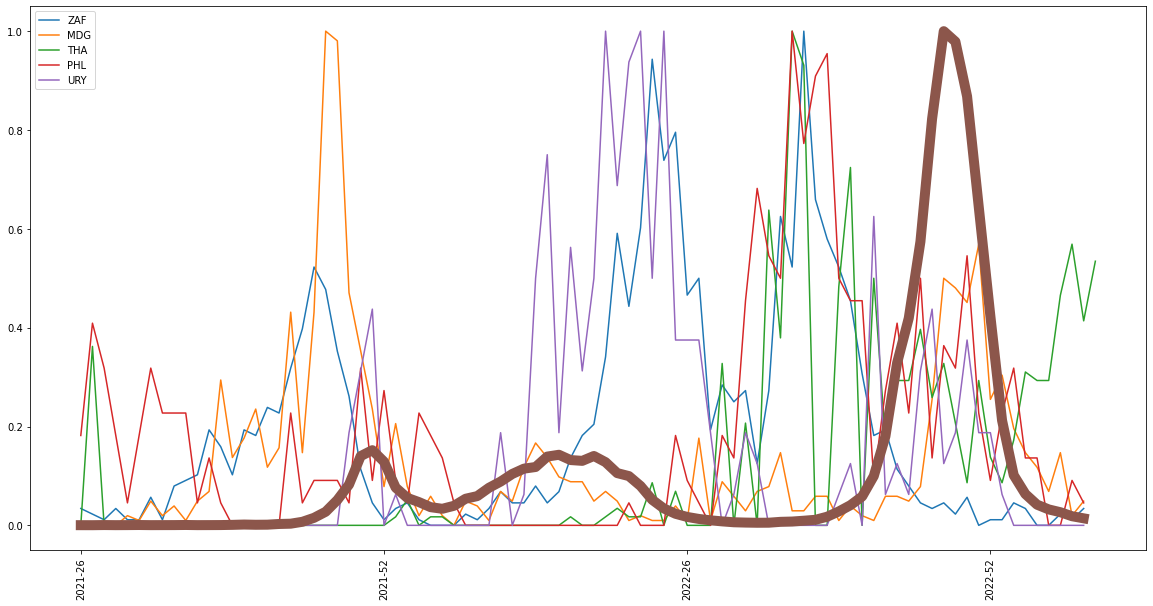

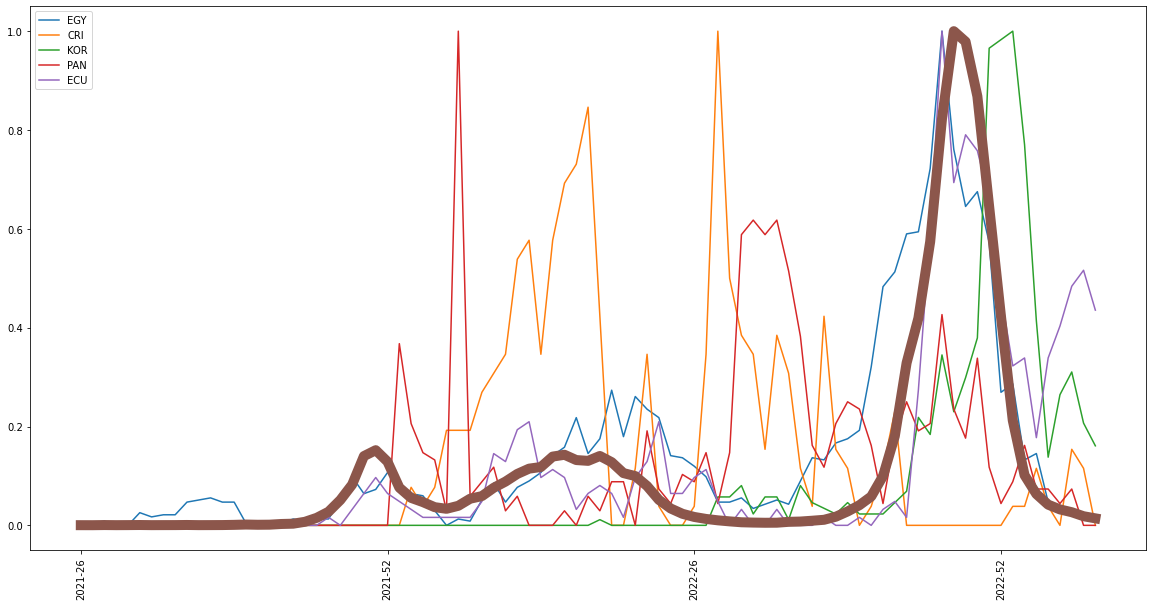

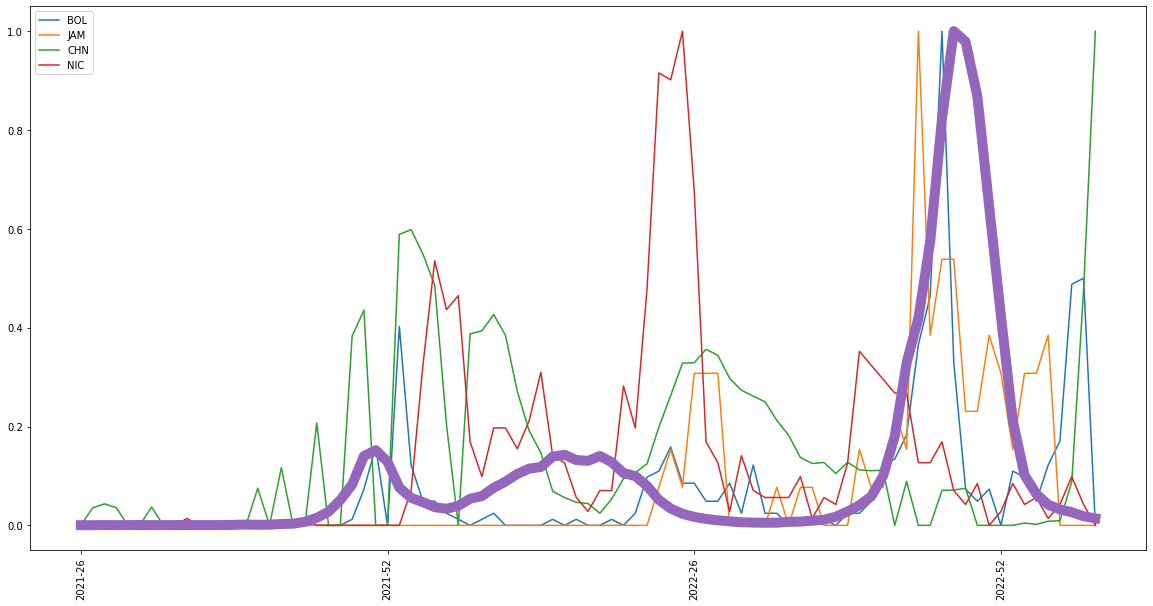

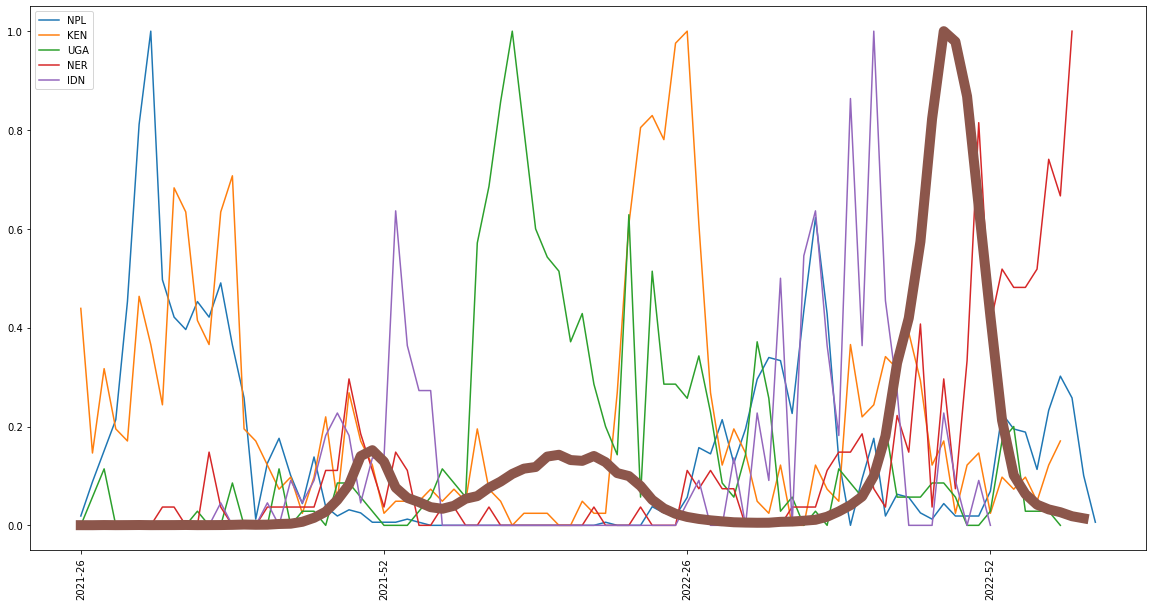

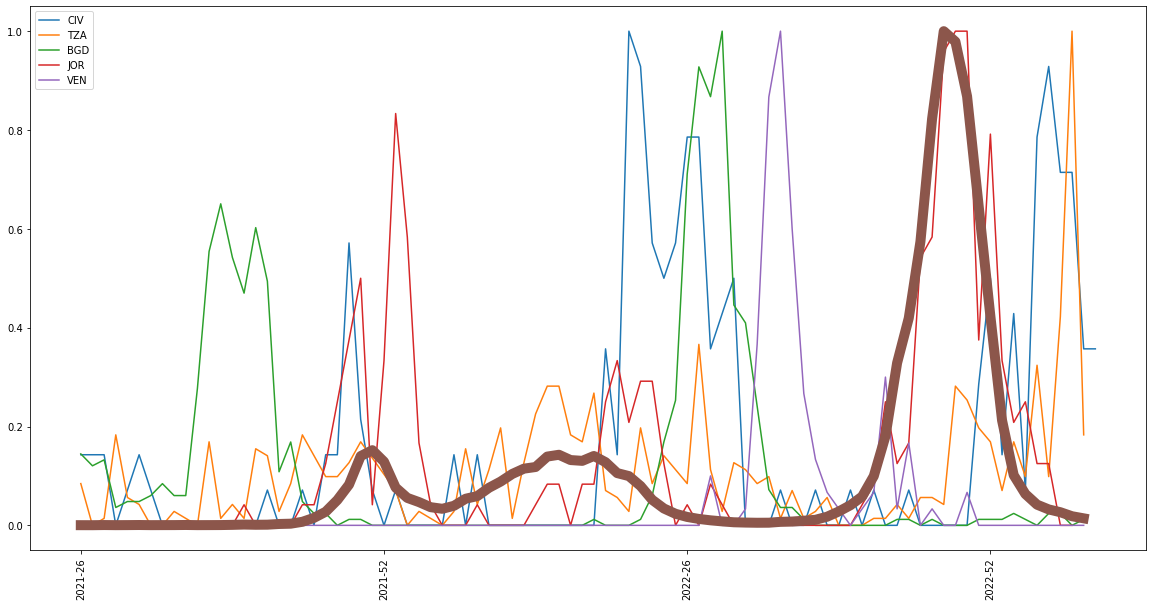

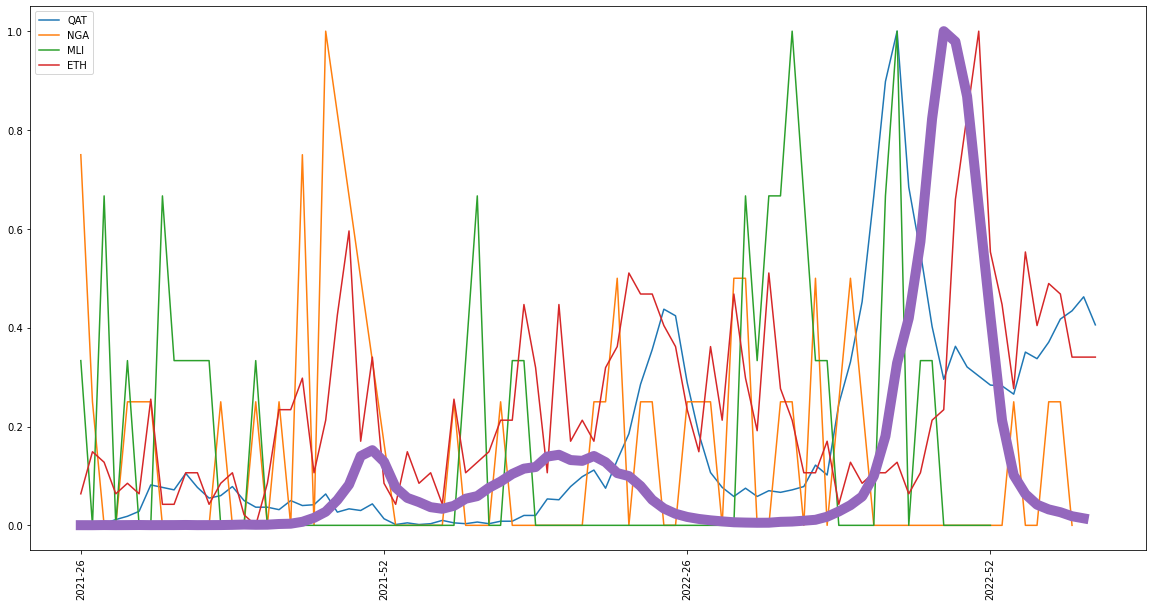

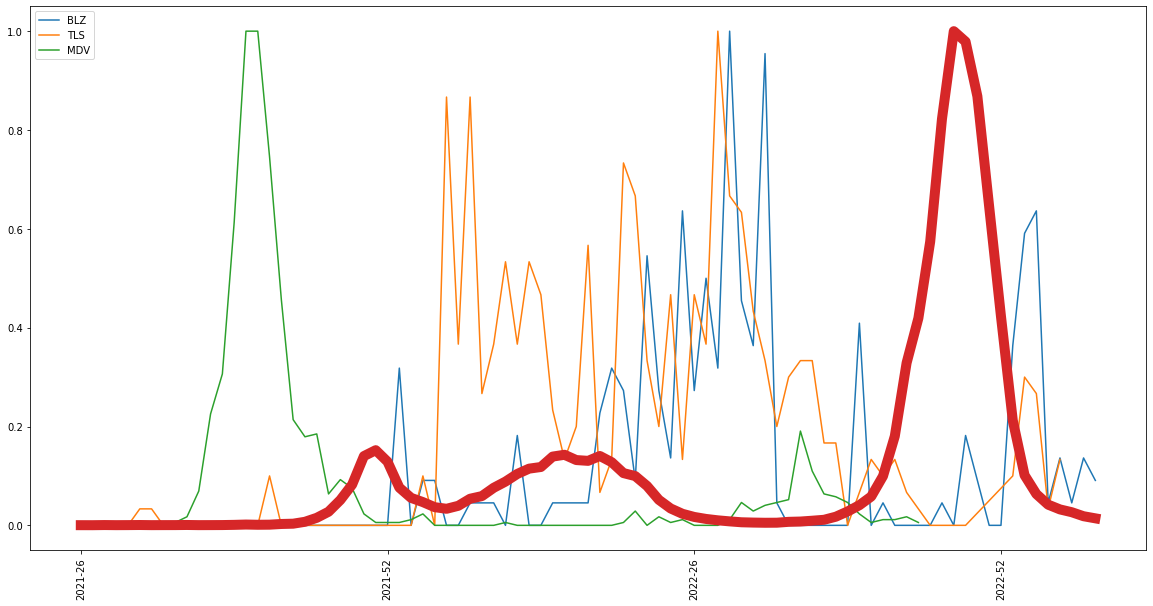

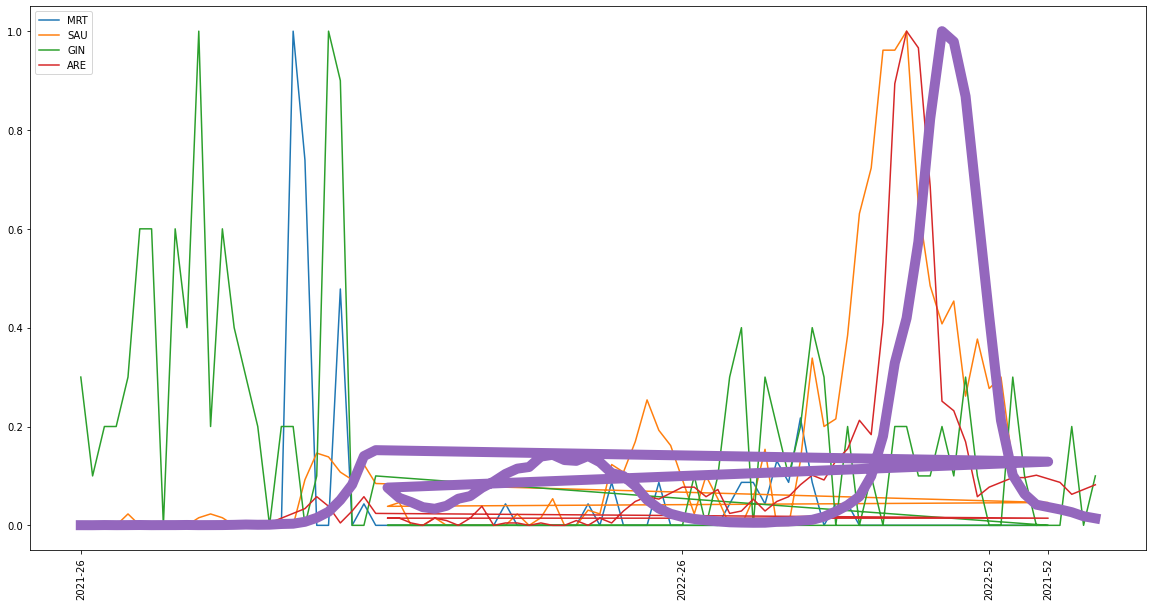

In [45]:


for batch in range(int(np.ceil(len(country_keep)/5))):
    
                   
    for country in country_keep[batch*5:(batch+1)*5]:
        country_inf_all = prep_country(country,"INF_ALL")
        if "2021-26" in list(country_inf_all.index):
            ind_start = list(country_inf_all.index).index("2021-26")
            tmp = country_inf_all[ind_start:]/country_inf_all[ind_start:].max()
            plt.plot(tmp,label = country)
            plt.legend(loc="upper left")
            plt.xticks(ticks=x_ticks[-4:],rotation=90)
    ind_start = list(usa_new.index).index("2021-26")
    tmp = usa_new[ind_start:]/usa_new[ind_start:].max()
    plt.plot(tmp,label = "USA",linewidth=10)
    plt.show()
    

In [60]:
X_lags =create_lags( prep_country("AUS","INF_ALL"),"INF_ALL",51-15,15,1)
ind_start = list(X_lags.index).index(dates[0])
ind_end = list(X_lags.index).index(dates[-1])
X_lags = X_lags[ind_start:ind_end]

In [61]:
for country in country_keep:
    country_inf_all = prep_country(country,"INF_ALL")
    
    
    X_lags_tmp = create_lags(country_inf_all,"INF_ALL",51-15,15,1)
    X_lags = X_lags.join(X_lags_tmp,on=X_lags.index,lsuffix="_"+country,rsuffix="_")

In [67]:
print(len(X_lags.columns))
X_lags = X_lags.fillna(0.)

1980


In [79]:
begin_ = 104
range_ = dates.index("2022-26")
X_train, y_train = X[begin_:range_], usa_new[begin_:range_]
Xlags_train = X_lags[begin_:range_]
X_test, y_test = X[range_:-1], usa_new[range_:]
Xlags_test = X_lags[range_:]

In [82]:
X_total = X.join(X_lags,on=X.index,lsuffix="_")
X_total = X_total.fillna(0.0)
X_total_train, X_total_test = X_total[begin_:range_], X_total[range_:]

In [83]:
bh.fit(X_train,Xlags_train,y_train)
bh_rf.fit(X_train,Xlags_train,y_train)
lin_reg.fit(X_total_train,y_train)
rf.fit(X_total_train,y_train)

/var/folders/zh/dvg4994d0_v8dpj_6tb0y44r0000gn/T/ipykernel_15608/2330458734.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_total_train,y_train)


RandomForestRegressor()

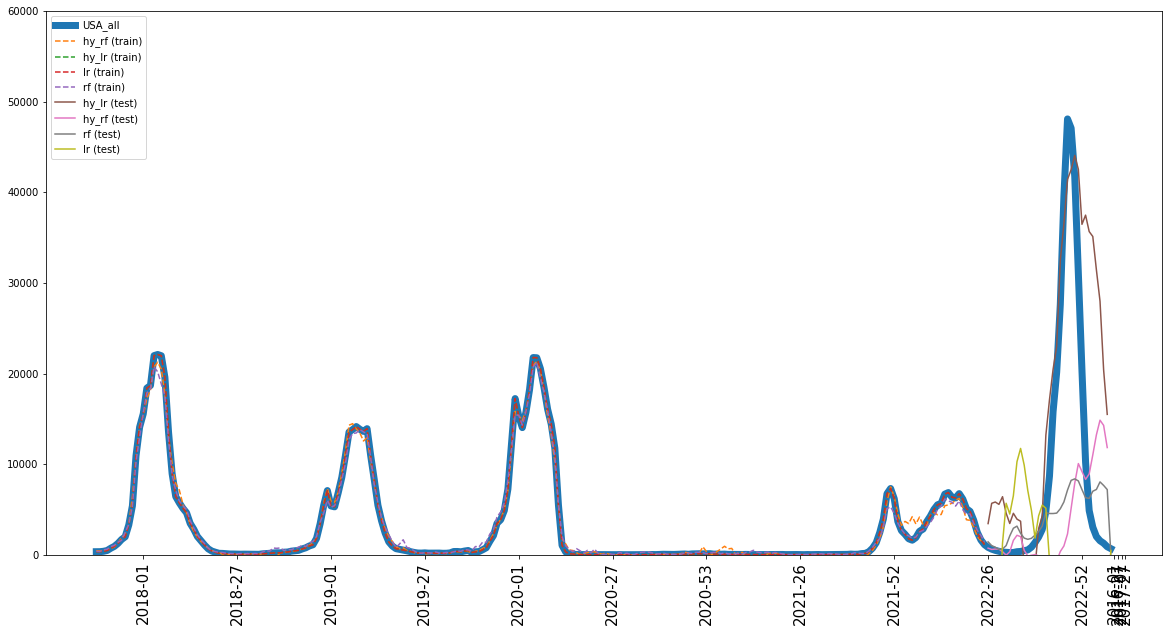

In [84]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.plot(dates[begin_:],usa_new[104:],label="USA_all",linewidth=7)
plt.plot(dates[begin_:range_],bh_rf.predict(X_train,Xlags_train),label = "hy_rf (train)",linestyle="dashed")
plt.plot(dates[begin_:range_],bh.predict(X_train,Xlags_train),label = "hy_lr (train)",linestyle="dashed")
plt.plot(dates[begin_:range_],lin_reg.predict(X_total_train),label = "lr (train)",linestyle="dashed")
plt.plot(dates[begin_:range_],rf.predict(X_total_train),label = "rf (train)",linestyle="dashed")


#plt.plot(dates[range_:],lin_reg.predict(X_test),label="Lin (test)")
plt.plot(dates[range_:-1],bh.predict(X_test,Xlags_test),label="hy_lr (test)")
plt.plot(dates[range_:-1],bh_rf.predict(X_test,Xlags_test),label="hy_rf (test)")
plt.plot(dates[range_:],rf.predict(X_total_test),label="rf (test)")
plt.plot(dates[range_:],lin_reg.predict(X_total_test),label="lr (test)")
plt.xticks(ticks = x_ticks,rotation=90,size=15)
plt.ylim([0,6e4])
plt.legend(loc="upper left")
plt.show()

In [86]:
## Pytorch
from torch import nn
from torch.utils.data import DataLoader
import torch
from torch.utils.data import Dataset, Subset

In [251]:
df = usa_new
for country in lag_country_list:
    country_inf_all = prep_country(country,"INF_ALL")
    df = df.join(country_inf_all,on=usa_new.index,rsuffix="_"+country,lsuffix="")

In [253]:
#df = df.fillna(0.0)
#df = df.drop(["INF_ALL"],axis=1)
print(len(df.columns))

181


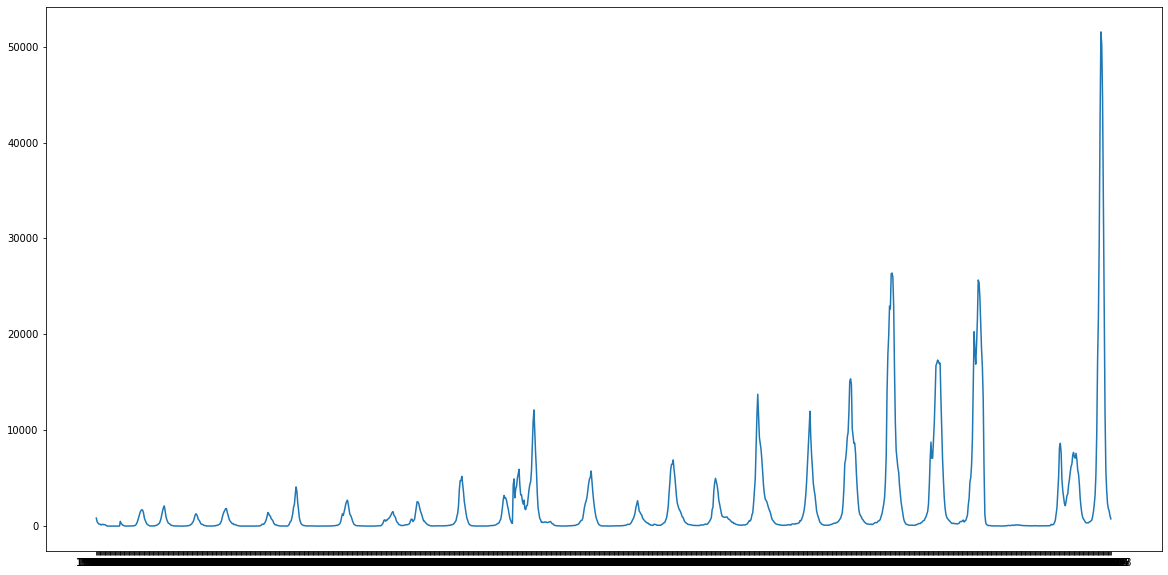

In [100]:
usa = prep_country("USA","INF_ALL")

In [270]:
class Dataset_(Dataset):
    def __init__(self,dataframe,target):
        step = 1
        length =  52
        shift = length + 15

        df_ss = StandardScaler().fit_transform(df)
        

        X = []
        for i in range(len(dataframe)):
            seq = []
            for j in range(length):
                index_ = j+i - shift
                if index_ >= 0:
                    seq.append(df_ss[index_])
                else:
                    seq.append(np.zeros(shape=(len(dataframe.columns),)))
            X.append(seq)
        X = np.array(X)
        print(X.shape)

        data = []
        y_numpy = target.to_numpy()

        for i in range(X.shape[0]):

            x= torch.from_numpy(X[i])
            y = torch.from_numpy(np.asarray(y_numpy[i]))
            data.append((x,y))


        
        self.data = data

    def __len__(self):
        return len(self.data)
    def __getitem__(self,i):
        return self.data[i]
        

In [118]:
matrix = Dataset_(df,_)

(386, 52, 54)


In [260]:
class CNN(nn.Module):

    def __init__(self,seq_len,feature_len):

        super(CNN, self).__init__()


        self.model_seq = nn.Sequential(

            nn.ReLU(),
            nn.Conv1d(seq_len,1,kernel_size=6),
            #nn.MaxPool1d(kernel_size=3),
            nn.Flatten(),
            nn.Dropout(0.25),
            nn.ReLU(),
            nn.Linear(176,1)


        )
        self.linear = nn.Sequential(
            nn.ReLU(),
            nn.Linear(feature_len,feature_len)
        )

    def forward(self, x):

        x = self.linear(x)

        logits = self.model_seq(x)

        return logits

In [122]:
def train(dataloader, model,device, loss_fn, optimizer):
    
    # train function gets called inside function train_model
    # set up to be general but loss_fn and optimizer are hardcoded in train_model

    model.train()
    cnt = 0
    total_loss = 0
    for batches in dataloader:
            x,y = batches
         
            x=x.to_dense().to(device)
            y= y.to(device)
            pred=  model(x.float())
          
            loss = loss_fn(pred,y.float())
           
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            
            loss,current = loss.item(), cnt * len(x) # can't remember why I wanted "current"
          
            cnt+=1
            total_loss+= loss
    return float(total_loss)

In [123]:
def test(dataloader, model, device,loss_fn):
    
    #same thing as train but doesn't run the optimizer

    num_batches = len(dataloader)
    
    model.eval()
    test_loss, correct = 0,0
    with torch.no_grad():
        for X, y in dataloader:
            X,y = X.to_dense().to(device), y.to(device)
            pred = model(X.float())
            
            test_loss+=loss_fn(pred,y.float()).item()
           
    return test_loss

In [124]:
def train_model(PATH,model,device,batched_sequence,learn_rate,num_epochs,kill,batch_size_,t_beg,t_end,forecast):

# This is the function for minimizing a model for a dataset, saves best val and train model in PATH and outputs two tuples of losses for train/val


# PATH = destination for saving/loading the model
# model, device = model class instance , resources
# batched_sequence = Dataset instance
# learn_rate = (float) learn_rate 
# num_epochs = (int) number of epochs
# kill = (int) if loss does not decrease for "kill" number of epochs end the routine
# batch_size_ = (int) batch size
# t_beg = (int) index in DATES to start fit
# t_end = (int) index in DATES to end fit
# forecast = (int) number of indices to include in validation beyond t_end

    #sparse_tensor = Dataset_(Y_df,dataframe_list) 
    #batched_sequence = SequenceDataset(sparse_tensor) # this is hard coded in but could get rid of this by just feeding batched_sequence as input
    loss_values = []
    pred = []
    train_ = Subset(batched_sequence,range(t_beg,t_end)) 
    train_dataloader = DataLoader(train_, batch_size=batch_size_, shuffle=False)

    test_ = Subset(batched_sequence,range(t_end,t_end+forecast))
    test_dataloader = DataLoader(test_, batch_size=1, shuffle=False)




    loss_fn = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate)
    losses, losses_test = [],[]
    c, epoch, loss_cut= 0,0, 1e12 # init
    d=c
    loss_cut_t = loss_cut

    while epoch < num_epochs:
    #for epoch in range(num_epochs):
        print("epoch",epoch,c,d)
        c+=1
        d+=1
        if d % 25 == 0 and d!=0:
            learn_rate*=0.1
            d=0
            
            print("Shrinkinkg learning rate to",str(learn_rate))
            if learn_rate < 1e-5:
                print("Learning rate getting small")
                learn_rate = 1e-2
   #         optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate)
        loss = train(train_dataloader,model,device,loss_fn,optimizer)
        losses.append(loss)
    
        loss_test = test(test_dataloader,model,device,loss_fn)
        losses_test.append(loss_test)
    
        print("Train loss:",loss,"Val loss:",loss_test)
    
        if loss_test < loss_cut:
            loss_cut = loss_test
            torch.save(model.state_dict(), PATH)
            c = 0
        if loss < loss_cut_t:
            loss_cut_t = loss
            torch.save(model.state_dict(), PATH[:-4]+"_train.pth")
            d = 0
       # test(train_dataloader,model,loss_fn)
    
        if d == kill and epoch > 25:
            break
        epoch +=1
            
    
    print("Complete")
    return losses,losses_test

In [180]:
def plot_history(loss_t,loss_v):

    # simple training history plotter

    # loss_t = tuple of training loss
    # loss_v = tuple of validation loss
    
    plt.plot(loss_t,label="train loss")
    plt.plot(loss_v,label="pred loss")
    #plt.ylim([0,0.02])
    plt.legend(loc="upper right")

In [209]:
def create_prediction(PATH,NN,batched_sequence):
    
    # PATH = location of model
    # NN = model class instance
    # batched_sequence= data class instance
    # Y_mean = mean of target for undoing standard scalar transform
    # Y_std = standard deviation of target for undoing standard scalar transform
    # norm_bool = True/False if you want to return Normalized/Raw transformation
    
    NN.load_state_dict(torch.load(PATH))
    NN.eval()
    #sparse_tensor = Dataset_(Y_df,dataframe_list)
    #batched_sequence = SequenceDataset(sparse_tensor)
    
    datas = DataLoader(batched_sequence, batch_size=1, shuffle=False)
    all_,ys = [],[]
    for x,y in datas:
        x=x.to_dense().to(device)
        
        pred= NN(x.float())
        #print(x,pred[:,0,0].detach().numpy())
        all_.append(pred[:,0].detach().numpy())
        ys.append(y.to_dense().numpy())
    all_ =  np.array(all_)
    
    return all_

In [271]:
device = torch.device("cpu")
model = CNN(52,181).to(device)
PATH = model.__class__.__name__+".train"
batched_sequence = Dataset_(df,usa[-386:])
learn_rate = 1e-3
num_epochs = 150
kill = num_epochs
batch_size_ = 3
t_beg = 0
t_end = list(df.index).index("2022-26")
forecast = len(df.index) - t_end

loss_t,loss_v = train_model(PATH,model,device,batched_sequence,learn_rate,num_epochs,kill,batch_size_,t_beg,t_end,forecast)


(386, 52, 181)
epoch 0 0 0
Train loss: 5393683409.852264 Val loss: 12103422122.532967
epoch 1 0 0
Train loss: 4583660301.427734 Val loss: 11062777121.612122
epoch 2 0 0
Train loss: 4029588298.828125 Val loss: 10725674045.889648
epoch 3 0 0
Train loss: 3752360675.4716797 Val loss: 10535362963.28125
epoch 4 0 0
Train loss: 3305328754.7265625 Val loss: 10373223358.773438
epoch 5 0 0
Train loss: 2791278808.355652 Val loss: 10258544393.259766
epoch 6 0 0
Train loss: 2249903604.51532 Val loss: 10200455895.265762
epoch 7 0 0
Train loss: 1811079585.9573975 Val loss: 10114505732.870117
epoch 8 0 0
Train loss: 1550880884.027954 Val loss: 10085866445.94043
epoch 9 0 0
Train loss: 1349538496.36615 Val loss: 10031184890.46289
epoch 10 0 0
Train loss: 1231626636.741394 Val loss: 9998763123.78418
epoch 11 0 0
Train loss: 1152887910.606598 Val loss: 9940282240.137207
epoch 12 0 0
Train loss: 1039232273.1219482 Val loss: 9891606378.850586
epoch 13 0 0
Train loss: 962102611.9424438 Val loss: 9826657565.

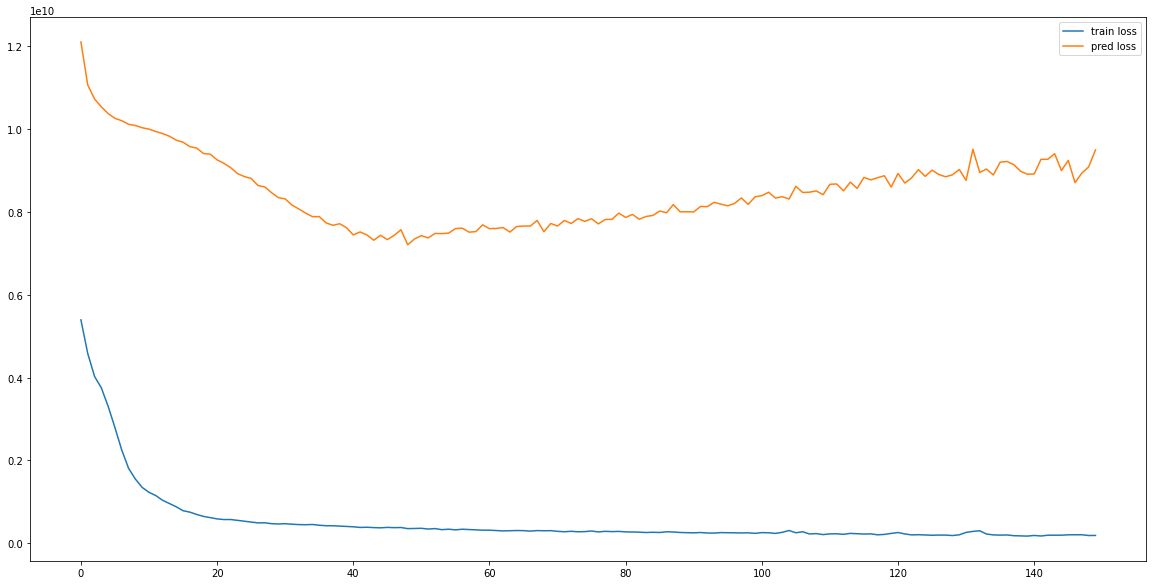

In [272]:
plot_history(loss_t,loss_v)

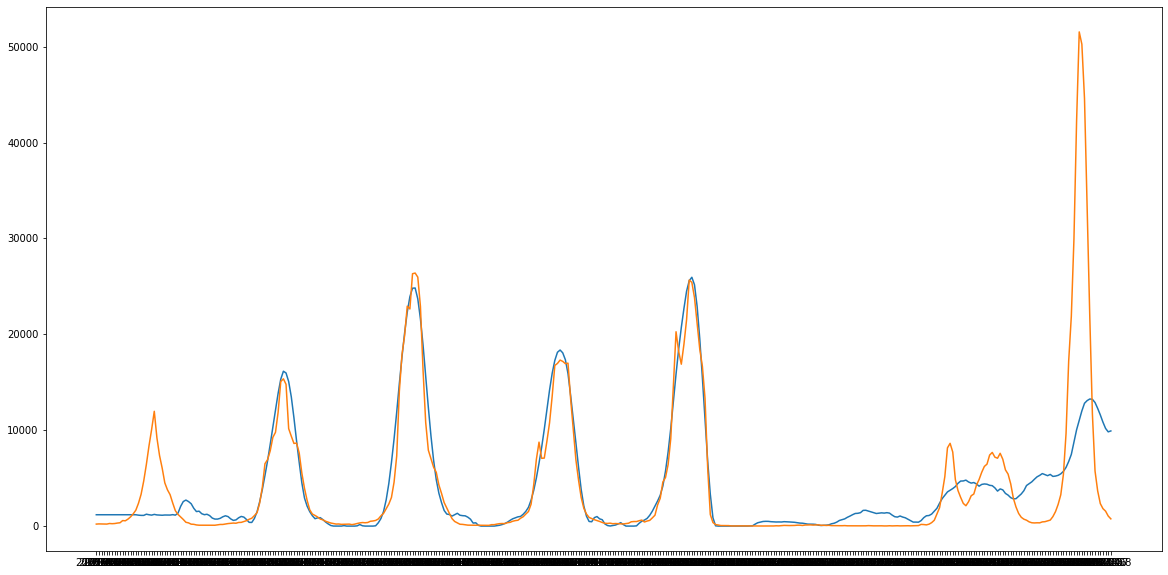

In [273]:
pred  = create_prediction(PATH,model,batched_sequence)
plt.plot(pred)
plt.plot(usa[-386:])

In [267]:
from sklearn.preprocessing import StandardScaler
df_ss = StandardScaler().fit_transform(df)

In [269]:
df_ss.shape

(386, 181)